In [161]:
import numpy as np
import scipy.stats as stats
import pandas as pd
import seaborn as sns

import matplotlib
import matplotlib.pyplot as plt
import urllib
import requests

from io import StringIO

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

plt.style.use('fivethirtyeight')

# Created by: Felipe Rodríguez.
### Purpose: run Linear and Machine Learning models on the predictors of migration.

### Data 

We use different datasets from the Worl Bank and the Migration Policy Institute. We use variables that measure economic performance, inequality, life expectancy, popultion, remittances and aid. We analyze only the three countries of the northern triangle; El Salvador, Guatemala and Honduras. These countries have the higher levels of emigration to the U.S. after Mexico in Latin America.

World bank data: governance, trade, labor conditions, economic performance, education and life expectancy

Migration Policy Institute: Migration the countries of the northern triangle of Central America

Time Series from 1980-2015 

### Models and robustness checks

OLS, Lasso, Elastic Net, Regression Tree, Random Forrest, PCA and KNN

### Findings

Our dependent variable has missing values, this may affect our results in the different estimations we are running. However, migration data from these countries is scarce and we are interested to analyze this topic even with the issues described. The results are enlightening, anyway.

It is fair to say, this is merely an exploratory attempt to compare Linear and Machine Learning models on the predictors of migration in the Northern Triangle of Central America. Further analysis should make efforts to use better secondary data and fix the collinearity issues described below. 

The best predictors according to the different models conducted are related to indicators of economic performance, population growth, remittances, trade, death rates and inequality.

# 1. Data Cleaning

Here we read, revise and clean each of the datasets separately and then we merge them to choose our main variables. We also drop variables with too many missing observations. For the rest of the variables we replace the missing values with the mean. Finally, we convert the variables to more appropriate formats. 

In [162]:
mig1 = pd.read_csv('/User directory+/MPI-Data-Hub-Region-birth_1960-2015_1.csv')

In [163]:
mig2 = pd.read_csv('/User directory+/Data_Extract_From_Education_Statistics_-_All_Indicators.csv')

In [164]:
mig3 = pd.read_csv('/User directory+/Data_Extract_From_Poverty_and_Equity_Database-3.csv')

In [165]:
mig4 = pd.read_csv('/User directory+/Data_Extract_From_Health_Nutrition_and_Population_Statistics_Population_estimates_and_projections.csv')

In [166]:
mig5 = pd.read_csv('/User directory+/Data_Extract_From_World_Development_Indicators-9.csv')

In [167]:
mig1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 3 columns):
Year                108 non-null int64
Country of Birth    108 non-null object
Migration           39 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 2.6+ KB


In [168]:
mig1

Year Country of Birth  Migration
0    1980      El Salvador   2.063205
1    1980        Guatemala   0.886027
2    1980         Honduras   1.076884
3    1981      El Salvador        NaN
4    1981        Guatemala        NaN
5    1981         Honduras        NaN
6    1982      El Salvador        NaN
7    1982        Guatemala        NaN
8    1982         Honduras        NaN
9    1983      El Salvador        NaN
10   1983        Guatemala        NaN
11   1983         Honduras        NaN
12   1984      El Salvador        NaN
13   1984        Guatemala        NaN
14   1984         Honduras        NaN
15   1985      El Salvador        NaN
16   1985        Guatemala        NaN
17   1985         Honduras        NaN
18   1986      El Salvador        NaN
19   1986        Guatemala        NaN
20   1986         Honduras        NaN
21   1987      El Salvador        NaN
22   1987        Guatemala        NaN
23   1987         Honduras        NaN
24   1988      El Salvador        NaN
25   1988        Guatemala        NaN
26   1988         Honduras        NaN
27   1989      El Salvador        NaN
28   1989        Guatemala        NaN
29   1989         Honduras        NaN
..    ...              ...        ...
78   2006      El Salvador  17.546949
79   2006        Guatemala   5.343950
80   2006         Honduras   5.783592
81   2007      El Salvador  18.448273
82   2007        Guatemala   5.077445
83   2007         Honduras   6.034761
84   2008      El Salvador  18.237120
85   2008        Guatemala   5.240451
86   2008         Honduras   6.339264
87   2009      El Salvador  19.096906
88   2009        Guatemala   5.539466
89   2009         Honduras   6.338030
90   2010      El Salvador  20.105788
91   2010        Guatemala   5.639487
92   2010         Honduras   6.964149
93   2011      El Salvador  20.886863
94   2011        Guatemala   5.653971
95   2011         Honduras   6.437598
96   2012      El Salvador  20.945491
97   2012        Guatemala   5.586203
98   2012         Honduras   6.743448
99   2013      El Salvador  20.560594
100  2013        Guatemala   5.750461
101  2013         Honduras   6.798242
102  2014      El Salvador  21.537939
103  2014        Guatemala   5.716933
104  2014         Honduras   7.389157
105  2015      El Salvador  22.073593
106  2015        Guatemala   5.675817
107  2015         Honduras   7.418273

[108 rows x 3 columns]

In [169]:
print mig1.isnull().sum()

Year                 0
Country of Birth     0
Migration           69
dtype: int64


### Replacing missing values with the mean of each decade

In [170]:
mig1.ix[mig1.Year==1981, 'Migration'] = 1.34203879
mig1.ix[mig1.Year==1982, 'Migration'] = 1.34203879
mig1.ix[mig1.Year==1983, 'Migration'] = 1.34203879
mig1.ix[mig1.Year==1984, 'Migration'] = 1.34203879
mig1.ix[mig1.Year==1985, 'Migration'] = 1.34203879
mig1.ix[mig1.Year==1986, 'Migration'] = 1.34203879
mig1.ix[mig1.Year==1987, 'Migration'] = 1.34203879
mig1.ix[mig1.Year==1988, 'Migration'] = 1.34203879
mig1.ix[mig1.Year==1989, 'Migration'] = 1.34203879

mig1.ix[mig1.Year==1991, 'Migration'] = 4.516020138
mig1.ix[mig1.Year==1992, 'Migration'] = 4.516020138
mig1.ix[mig1.Year==1993, 'Migration'] = 4.516020138
mig1.ix[mig1.Year==1994, 'Migration'] = 4.516020138
mig1.ix[mig1.Year==1995, 'Migration'] = 4.516020138
mig1.ix[mig1.Year==1996, 'Migration'] = 4.516020138
mig1.ix[mig1.Year==1997, 'Migration'] = 4.516020138
mig1.ix[mig1.Year==1998, 'Migration'] = 4.516020138
mig1.ix[mig1.Year==1999, 'Migration'] = 4.516020138

mig1.ix[mig1.Year==2001, 'Migration'] = 7.56872769
mig1.ix[mig1.Year==2002, 'Migration'] = 7.56872769
mig1.ix[mig1.Year==2003, 'Migration'] = 7.56872769
mig1.ix[mig1.Year==2004, 'Migration'] = 7.56872769
mig1.ix[mig1.Year==2005, 'Migration'] = 7.56872769

In [171]:
mig1

Year Country of Birth  Migration
0    1980      El Salvador   2.063205
1    1980        Guatemala   0.886027
2    1980         Honduras   1.076884
3    1981      El Salvador   1.342039
4    1981        Guatemala   1.342039
5    1981         Honduras   1.342039
6    1982      El Salvador   1.342039
7    1982        Guatemala   1.342039
8    1982         Honduras   1.342039
9    1983      El Salvador   1.342039
10   1983        Guatemala   1.342039
11   1983         Honduras   1.342039
12   1984      El Salvador   1.342039
13   1984        Guatemala   1.342039
14   1984         Honduras   1.342039
15   1985      El Salvador   1.342039
16   1985        Guatemala   1.342039
17   1985         Honduras   1.342039
18   1986      El Salvador   1.342039
19   1986        Guatemala   1.342039
20   1986         Honduras   1.342039
21   1987      El Salvador   1.342039
22   1987        Guatemala   1.342039
23   1987         Honduras   1.342039
24   1988      El Salvador   1.342039
25   1988        Guatemala   1.342039
26   1988         Honduras   1.342039
27   1989      El Salvador   1.342039
28   1989        Guatemala   1.342039
29   1989         Honduras   1.342039
..    ...              ...        ...
78   2006      El Salvador  17.546949
79   2006        Guatemala   5.343950
80   2006         Honduras   5.783592
81   2007      El Salvador  18.448273
82   2007        Guatemala   5.077445
83   2007         Honduras   6.034761
84   2008      El Salvador  18.237120
85   2008        Guatemala   5.240451
86   2008         Honduras   6.339264
87   2009      El Salvador  19.096906
88   2009        Guatemala   5.539466
89   2009         Honduras   6.338030
90   2010      El Salvador  20.105788
91   2010        Guatemala   5.639487
92   2010         Honduras   6.964149
93   2011      El Salvador  20.886863
94   2011        Guatemala   5.653971
95   2011         Honduras   6.437598
96   2012      El Salvador  20.945491
97   2012        Guatemala   5.586203
98   2012         Honduras   6.743448
99   2013      El Salvador  20.560594
100  2013        Guatemala   5.750461
101  2013         Honduras   6.798242
102  2014      El Salvador  21.537939
103  2014        Guatemala   5.716933
104  2014         Honduras   7.389157
105  2015      El Salvador  22.073593
106  2015        Guatemala   5.675817
107  2015         Honduras   7.418273

[108 rows x 3 columns]

In [172]:
mig1.rename(columns={
        'Country of Birth': 'Country'
        }, inplace=True)

In [173]:
mig1

Year      Country  Migration
0    1980  El Salvador   2.063205
1    1980    Guatemala   0.886027
2    1980     Honduras   1.076884
3    1981  El Salvador   1.342039
4    1981    Guatemala   1.342039
5    1981     Honduras   1.342039
6    1982  El Salvador   1.342039
7    1982    Guatemala   1.342039
8    1982     Honduras   1.342039
9    1983  El Salvador   1.342039
10   1983    Guatemala   1.342039
11   1983     Honduras   1.342039
12   1984  El Salvador   1.342039
13   1984    Guatemala   1.342039
14   1984     Honduras   1.342039
15   1985  El Salvador   1.342039
16   1985    Guatemala   1.342039
17   1985     Honduras   1.342039
18   1986  El Salvador   1.342039
19   1986    Guatemala   1.342039
20   1986     Honduras   1.342039
21   1987  El Salvador   1.342039
22   1987    Guatemala   1.342039
23   1987     Honduras   1.342039
24   1988  El Salvador   1.342039
25   1988    Guatemala   1.342039
26   1988     Honduras   1.342039
27   1989  El Salvador   1.342039
28   1989    Guatemala   1.342039
29   1989     Honduras   1.342039
..    ...          ...        ...
78   2006  El Salvador  17.546949
79   2006    Guatemala   5.343950
80   2006     Honduras   5.783592
81   2007  El Salvador  18.448273
82   2007    Guatemala   5.077445
83   2007     Honduras   6.034761
84   2008  El Salvador  18.237120
85   2008    Guatemala   5.240451
86   2008     Honduras   6.339264
87   2009  El Salvador  19.096906
88   2009    Guatemala   5.539466
89   2009     Honduras   6.338030
90   2010  El Salvador  20.105788
91   2010    Guatemala   5.639487
92   2010     Honduras   6.964149
93   2011  El Salvador  20.886863
94   2011    Guatemala   5.653971
95   2011     Honduras   6.437598
96   2012  El Salvador  20.945491
97   2012    Guatemala   5.586203
98   2012     Honduras   6.743448
99   2013  El Salvador  20.560594
100  2013    Guatemala   5.750461
101  2013     Honduras   6.798242
102  2014  El Salvador  21.537939
103  2014    Guatemala   5.716933
104  2014     Honduras   7.389157
105  2015  El Salvador  22.073593
106  2015    Guatemala   5.675817
107  2015     Honduras   7.418273

[108 rows x 3 columns]

In [174]:
mig1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 3 columns):
Year         108 non-null int64
Country      108 non-null object
Migration    108 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 2.6+ KB


In [175]:
mig2

Time Time Code      Country Country Code  \
0    1980    YR1980  El Salvador          SLV   
1    1980    YR1980    Guatemala          GTM   
2    1980    YR1980     Honduras          HND   
3    1981    YR1981  El Salvador          SLV   
4    1981    YR1981    Guatemala          GTM   
5    1981    YR1981     Honduras          HND   
6    1982    YR1982  El Salvador          SLV   
7    1982    YR1982    Guatemala          GTM   
8    1982    YR1982     Honduras          HND   
9    1983    YR1983  El Salvador          SLV   
10   1983    YR1983    Guatemala          GTM   
11   1983    YR1983     Honduras          HND   
12   1984    YR1984  El Salvador          SLV   
13   1984    YR1984    Guatemala          GTM   
14   1984    YR1984     Honduras          HND   
15   1985    YR1985  El Salvador          SLV   
16   1985    YR1985    Guatemala          GTM   
17   1985    YR1985     Honduras          HND   
18   1986    YR1986  El Salvador          SLV   
19   1986    YR1986    Guatemala          GTM   
20   1986    YR1986     Honduras          HND   
21   1987    YR1987  El Salvador          SLV   
22   1987    YR1987    Guatemala          GTM   
23   1987    YR1987     Honduras          HND   
24   1988    YR1988  El Salvador          SLV   
25   1988    YR1988    Guatemala          GTM   
26   1988    YR1988     Honduras          HND   
27   1989    YR1989  El Salvador          SLV   
28   1989    YR1989    Guatemala          GTM   
29   1989    YR1989     Honduras          HND   
..    ...       ...          ...          ...   
78   2006    YR2006  El Salvador          SLV   
79   2006    YR2006    Guatemala          GTM   
80   2006    YR2006     Honduras          HND   
81   2007    YR2007  El Salvador          SLV   
82   2007    YR2007    Guatemala          GTM   
83   2007    YR2007     Honduras          HND   
84   2008    YR2008  El Salvador          SLV   
85   2008    YR2008    Guatemala          GTM   
86   2008    YR2008     Honduras          HND   
87   2009    YR2009  El Salvador          SLV   
88   2009    YR2009    Guatemala          GTM   
89   2009    YR2009     Honduras          HND   
90   2010    YR2010  El Salvador          SLV   
91   2010    YR2010    Guatemala          GTM   
92   2010    YR2010     Honduras          HND   
93   2011    YR2011  El Salvador          SLV   
94   2011    YR2011    Guatemala          GTM   
95   2011    YR2011     Honduras          HND   
96   2012    YR2012  El Salvador          SLV   
97   2012    YR2012    Guatemala          GTM   
98   2012    YR2012     Honduras          HND   
99   2013    YR2013  El Salvador          SLV   
100  2013    YR2013    Guatemala          GTM   
101  2013    YR2013     Honduras          HND   
102  2014    YR2014  El Salvador          SLV   
103  2014    YR2014    Guatemala          GTM   
104  2014    YR2014     Honduras          HND   
105  2015    YR2015  El Salvador          SLV   
106  2015    YR2015    Guatemala          GTM   
107  2015    YR2015     Honduras          HND   

    Enrolment in tertiary education per 100,000 inhabitants, both sexes [UIS.TE_100000.56]  \
0                                                   ..                                       
1                                                   ..                                       
2                                          713.5259399                                       
3                                                   ..                                       
4                                          493.2778625                                       
5                                          821.0927124                                       
6                                          999.5952759                                       
7                                                   ..                                       
8                                          864.4645996                                       
9                         

In [176]:
del mig2['Time Code']
del mig2['Country Code']

In [177]:
mig2

Time      Country  \
0    1980  El Salvador   
1    1980    Guatemala   
2    1980     Honduras   
3    1981  El Salvador   
4    1981    Guatemala   
5    1981     Honduras   
6    1982  El Salvador   
7    1982    Guatemala   
8    1982     Honduras   
9    1983  El Salvador   
10   1983    Guatemala   
11   1983     Honduras   
12   1984  El Salvador   
13   1984    Guatemala   
14   1984     Honduras   
15   1985  El Salvador   
16   1985    Guatemala   
17   1985     Honduras   
18   1986  El Salvador   
19   1986    Guatemala   
20   1986     Honduras   
21   1987  El Salvador   
22   1987    Guatemala   
23   1987     Honduras   
24   1988  El Salvador   
25   1988    Guatemala   
26   1988     Honduras   
27   1989  El Salvador   
28   1989    Guatemala   
29   1989     Honduras   
..    ...          ...   
78   2006  El Salvador   
79   2006    Guatemala   
80   2006     Honduras   
81   2007  El Salvador   
82   2007    Guatemala   
83   2007     Honduras   
84   2008  El Salvador   
85   2008    Guatemala   
86   2008     Honduras   
87   2009  El Salvador   
88   2009    Guatemala   
89   2009     Honduras   
90   2010  El Salvador   
91   2010    Guatemala   
92   2010     Honduras   
93   2011  El Salvador   
94   2011    Guatemala   
95   2011     Honduras   
96   2012  El Salvador   
97   2012    Guatemala   
98   2012     Honduras   
99   2013  El Salvador   
100  2013    Guatemala   
101  2013     Honduras   
102  2014  El Salvador   
103  2014    Guatemala   
104  2014     Honduras   
105  2015  El Salvador   
106  2015    Guatemala   
107  2015     Honduras   

    Enrolment in tertiary education per 100,000 inhabitants, both sexes [UIS.TE_100000.56]  \
0                                                   ..                                       
1                                                   ..                                       
2                                          713.5259399                                       
3                                                   ..                                       
4                                          493.2778625                                       
5                                          821.0927124                                       
6                                          999.5952759                                       
7                                                   ..                                       
8                                          864.4645996                                       
9                                          1203.906616                                       
10                                         571.4475708                                       
11                                         868.4456787                                       
12                                         1310.496826                                       
13                                         578.3195801                                       
14                                         874.7142334                                       
15                                         1439.984375                                       
16                                         597.5586548                                       
17                                         868.4234009                                       
18                                         1492.553833                                       
19                                         626.2062378                                       
20                                                  ..                                       
21                                                  ..                                       
22                                                  ..                                       
23                                          835.494751                                       
24                                        

In [178]:
mig2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 7 columns):
Time                                                                                      108 non-null int64
Country                                                                                   108 non-null object
Enrolment in tertiary education per 100,000 inhabitants, both sexes [UIS.TE_100000.56]    108 non-null object
GDP per capita (constant 2005 US$) [NY.GDP.PCAP.KD]                                       108 non-null float64
Population, ages 0-14 (% of total) [SP.POP.0014.TO.ZS]                                    108 non-null float64
Population, ages 15-64 (% of total) [SP.POP.1564.TO.ZS]                                   108 non-null float64
Primary completion rate, both sexes (%) [SE.PRM.CMPT.ZS]                                  108 non-null object
dtypes: float64(3), int64(1), object(3)
memory usage: 6.0+ KB


In [179]:
mig2.rename(columns={
        'Time': 'Year',
        'Enrolment in tertiary education per 100,000 inhabitants, both sexes [UIS.TE_100000.56]': 'enrolment_tertiary',
        'GDP per capita (constant 2005 US$) [NY.GDP.PCAP.KD]': 'GDP_percapita_constant',
        'Population, ages 0-14 (% of total) [SP.POP.0014.TO.ZS]': 'pop_ages_0-14%',
        'Population, ages 15-64 (% of total) [SP.POP.1564.TO.ZS]': 'pop_ages_14-64%',
        'Primary completion rate, both sexes (%) [SE.PRM.CMPT.ZS]': 'primary_completion'
        }, inplace=True)

In [180]:
mig2

Year      Country enrolment_tertiary  GDP_percapita_constant  \
0    1980  El Salvador                 ..             2572.813235   
1    1980    Guatemala                 ..             2560.782037   
2    1980     Honduras        713.5259399             1655.946421   
3    1981  El Salvador                 ..             2267.095959   
4    1981    Guatemala        493.2778625             2509.736778   
5    1981     Honduras        821.0927124             1645.846419   
6    1982  El Salvador        999.5952759             2092.554425   
7    1982    Guatemala                 ..             2357.368296   
8    1982     Honduras        864.4645996             1573.671559   
9    1983  El Salvador        1203.906616             2094.864582   
10   1983    Guatemala        571.4475708             2236.567544   
11   1983     Honduras        868.4456787             1512.185833   
12   1984  El Salvador        1310.496826             2094.098791   
13   1984    Guatemala        578.3195801             2189.829730   
14   1984     Honduras        874.7142334             1530.695403   
15   1985  El Salvador        1439.984375             2078.900486   
16   1985    Guatemala        597.5586548             2121.873660   
17   1985     Honduras        868.4234009             1547.357836   
18   1986  El Salvador        1492.553833             2055.438830   
19   1986    Guatemala        626.2062378             2073.066614   
20   1986     Honduras                 ..             1512.507552   
21   1987  El Salvador                 ..             2079.844180   
22   1987    Guatemala                 ..             2095.342199   
23   1987     Honduras         835.494751             1556.855276   
24   1988  El Salvador        1515.808716             2091.693100   
25   1988    Guatemala                 ..             2125.624163   
26   1988     Honduras        930.5723877             1581.639092   
27   1989  El Salvador         1568.25354             2084.671422   
28   1989    Guatemala                 ..             2157.313890   
29   1989     Honduras        925.7636719             1603.219717   
..    ...          ...                ...                     ...   
78   2006  El Salvador        2093.922607             3475.866745   
79   2006    Guatemala                 ..             2698.985240   
80   2006     Honduras                 ..             2017.943010   
81   2007  El Salvador        2209.102051             3597.961991   
82   2007    Guatemala        1695.110107             2805.169791   
83   2007     Honduras                 ..             2104.759589   
84   2008  El Salvador        2308.634277             3633.014903   
85   2008    Guatemala                 ..             2833.735795   
86   2008     Honduras        2035.134766             2155.827865   
87   2009  El Salvador        2388.975342             3509.156436   
88   2009    Guatemala                 ..             2787.128287   
89   2009     Honduras                 ..             2068.185180   
90   2010  El Salvador        2484.339111             3547.070983   
91   2010    Guatemala                 ..             2805.951416   
92   2010     Honduras        2263.870361             2110.822021   
93   2011  El Salvador        2648.530029             3615.583230   
94   2011    Guatemala                 ..             2861.167894   
95   2011     Honduras                 ..             2157.984444   
96   2012  El Salvador        2797.323486             3673.262887   
97   2012    Guatemala                 ..             2884.897429   
98   2012     Honduras        2261.272461             2213.759527   
99   2013  El Salvador        2891.187012             3730.422292   
100  2013    Guatemala        1871.932129             2930.170750   
101  2013     Honduras        2340.688232             2242.818455   
102  2014  El Salvador        2886.402832             3772.401570   
103  2014    Guatemala                 ..             2990.594485   
104

In [181]:
mig2['primary_completion'] = pd.to_numeric(mig2['primary_completion'], errors='coerce')

In [182]:
mig2['enrolment_tertiary'] = pd.to_numeric(mig2['enrolment_tertiary'], errors='coerce')

In [183]:
mig2

Year      Country  enrolment_tertiary  GDP_percapita_constant  \
0    1980  El Salvador                 NaN             2572.813235   
1    1980    Guatemala                 NaN             2560.782037   
2    1980     Honduras          713.525940             1655.946421   
3    1981  El Salvador                 NaN             2267.095959   
4    1981    Guatemala          493.277863             2509.736778   
5    1981     Honduras          821.092712             1645.846419   
6    1982  El Salvador          999.595276             2092.554425   
7    1982    Guatemala                 NaN             2357.368296   
8    1982     Honduras          864.464600             1573.671559   
9    1983  El Salvador         1203.906616             2094.864582   
10   1983    Guatemala          571.447571             2236.567544   
11   1983     Honduras          868.445679             1512.185833   
12   1984  El Salvador         1310.496826             2094.098791   
13   1984    Guatemala          578.319580             2189.829730   
14   1984     Honduras          874.714233             1530.695403   
15   1985  El Salvador         1439.984375             2078.900486   
16   1985    Guatemala          597.558655             2121.873660   
17   1985     Honduras          868.423401             1547.357836   
18   1986  El Salvador         1492.553833             2055.438830   
19   1986    Guatemala          626.206238             2073.066614   
20   1986     Honduras                 NaN             1512.507552   
21   1987  El Salvador                 NaN             2079.844180   
22   1987    Guatemala                 NaN             2095.342199   
23   1987     Honduras          835.494751             1556.855276   
24   1988  El Salvador         1515.808716             2091.693100   
25   1988    Guatemala                 NaN             2125.624163   
26   1988     Honduras          930.572388             1581.639092   
27   1989  El Salvador         1568.253540             2084.671422   
28   1989    Guatemala                 NaN             2157.313890   
29   1989     Honduras          925.763672             1603.219717   
..    ...          ...                 ...                     ...   
78   2006  El Salvador         2093.922607             3475.866745   
79   2006    Guatemala                 NaN             2698.985240   
80   2006     Honduras                 NaN             2017.943010   
81   2007  El Salvador         2209.102051             3597.961991   
82   2007    Guatemala         1695.110107             2805.169791   
83   2007     Honduras                 NaN             2104.759589   
84   2008  El Salvador         2308.634277             3633.014903   
85   2008    Guatemala                 NaN             2833.735795   
86   2008     Honduras         2035.134766             2155.827865   
87   2009  El Salvador         2388.975342             3509.156436   
88   2009    Guatemala                 NaN             2787.128287   
89   2009     Honduras                 NaN             2068.185180   
90   2010  El Salvador         2484.339111             3547.070983   
91   2010    Guatemala                 NaN             2805.951416   
92   2010     Honduras         2263.870361             2110.822021   
93   2011  El Salvador         2648.530029             3615.583230   
94   2011    Guatemala                 NaN             2861.167894   
95   2011     Honduras                 NaN             2157.984444   
96   2012  El Salvador         2797.323486             3673.262887   
97   2012    Guatemala                 NaN             2884.897429   
98   2012     Honduras         2261.272461             2213.759527   
99   2013  El Salvador         2891.187012             3730.422292   
100  2013    Guatemala         1871.932129             2930.170750   
101  2013     Honduras         2340.688232             2242.818455   
102  2014  El Salvador         2886.402832             3772.401570   
103  2014    Gu

In [184]:
mig2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 7 columns):
Year                      108 non-null int64
Country                   108 non-null object
enrolment_tertiary        68 non-null float64
GDP_percapita_constant    108 non-null float64
pop_ages_0-14%            108 non-null float64
pop_ages_14-64%           108 non-null float64
primary_completion        71 non-null float64
dtypes: float64(5), int64(1), object(1)
memory usage: 6.0+ KB


In [185]:
mig2['enrolment_tertiary'].fillna(np.mean(mig2['enrolment_tertiary']), inplace=True)

In [186]:
mig2['primary_completion'].fillna(np.mean(mig2['primary_completion']), inplace=True)

In [187]:
mig2

Year      Country  enrolment_tertiary  GDP_percapita_constant  \
0    1980  El Salvador         1516.400016             2572.813235   
1    1980    Guatemala         1516.400016             2560.782037   
2    1980     Honduras          713.525940             1655.946421   
3    1981  El Salvador         1516.400016             2267.095959   
4    1981    Guatemala          493.277863             2509.736778   
5    1981     Honduras          821.092712             1645.846419   
6    1982  El Salvador          999.595276             2092.554425   
7    1982    Guatemala         1516.400016             2357.368296   
8    1982     Honduras          864.464600             1573.671559   
9    1983  El Salvador         1203.906616             2094.864582   
10   1983    Guatemala          571.447571             2236.567544   
11   1983     Honduras          868.445679             1512.185833   
12   1984  El Salvador         1310.496826             2094.098791   
13   1984    Guatemala          578.319580             2189.829730   
14   1984     Honduras          874.714233             1530.695403   
15   1985  El Salvador         1439.984375             2078.900486   
16   1985    Guatemala          597.558655             2121.873660   
17   1985     Honduras          868.423401             1547.357836   
18   1986  El Salvador         1492.553833             2055.438830   
19   1986    Guatemala          626.206238             2073.066614   
20   1986     Honduras         1516.400016             1512.507552   
21   1987  El Salvador         1516.400016             2079.844180   
22   1987    Guatemala         1516.400016             2095.342199   
23   1987     Honduras          835.494751             1556.855276   
24   1988  El Salvador         1515.808716             2091.693100   
25   1988    Guatemala         1516.400016             2125.624163   
26   1988     Honduras          930.572388             1581.639092   
27   1989  El Salvador         1568.253540             2084.671422   
28   1989    Guatemala         1516.400016             2157.313890   
29   1989     Honduras          925.763672             1603.219717   
..    ...          ...                 ...                     ...   
78   2006  El Salvador         2093.922607             3475.866745   
79   2006    Guatemala         1516.400016             2698.985240   
80   2006     Honduras         1516.400016             2017.943010   
81   2007  El Salvador         2209.102051             3597.961991   
82   2007    Guatemala         1695.110107             2805.169791   
83   2007     Honduras         1516.400016             2104.759589   
84   2008  El Salvador         2308.634277             3633.014903   
85   2008    Guatemala         1516.400016             2833.735795   
86   2008     Honduras         2035.134766             2155.827865   
87   2009  El Salvador         2388.975342             3509.156436   
88   2009    Guatemala         1516.400016             2787.128287   
89   2009     Honduras         1516.400016             2068.185180   
90   2010  El Salvador         2484.339111             3547.070983   
91   2010    Guatemala         1516.400016             2805.951416   
92   2010     Honduras         2263.870361             2110.822021   
93   2011  El Salvador         2648.530029             3615.583230   
94   2011    Guatemala         1516.400016             2861.167894   
95   2011     Honduras         1516.400016             2157.984444   
96   2012  El Salvador         2797.323486             3673.262887   
97   2012    Guatemala         1516.400016             2884.897429   
98   2012     Honduras         2261.272461             2213.759527   
99   2013  El Salvador         2891.187012             3730.422292   
100  2013    Guatemala         1871.932129             2930.170750   
101  2013     Honduras         2340.688232             2242.818455   
102  2014  El Salvador         2886.402832             3772.401570   
103  2014    Gu

In [188]:
mig3

Year Year Code      Country Country Code  \
0    1980    YR1980  El Salvador          SLV   
1    1980    YR1980    Guatemala          GTM   
2    1980    YR1980     Honduras          HND   
3    1981    YR1981  El Salvador          SLV   
4    1981    YR1981    Guatemala          GTM   
5    1981    YR1981     Honduras          HND   
6    1982    YR1982  El Salvador          SLV   
7    1982    YR1982    Guatemala          GTM   
8    1982    YR1982     Honduras          HND   
9    1983    YR1983  El Salvador          SLV   
10   1983    YR1983    Guatemala          GTM   
11   1983    YR1983     Honduras          HND   
12   1984    YR1984  El Salvador          SLV   
13   1984    YR1984    Guatemala          GTM   
14   1984    YR1984     Honduras          HND   
15   1985    YR1985  El Salvador          SLV   
16   1985    YR1985    Guatemala          GTM   
17   1985    YR1985     Honduras          HND   
18   1986    YR1986  El Salvador          SLV   
19   1986    YR1986    Guatemala          GTM   
20   1986    YR1986     Honduras          HND   
21   1987    YR1987  El Salvador          SLV   
22   1987    YR1987    Guatemala          GTM   
23   1987    YR1987     Honduras          HND   
24   1988    YR1988  El Salvador          SLV   
25   1988    YR1988    Guatemala          GTM   
26   1988    YR1988     Honduras          HND   
27   1989    YR1989  El Salvador          SLV   
28   1989    YR1989    Guatemala          GTM   
29   1989    YR1989     Honduras          HND   
..    ...       ...          ...          ...   
78   2006    YR2006  El Salvador          SLV   
79   2006    YR2006    Guatemala          GTM   
80   2006    YR2006     Honduras          HND   
81   2007    YR2007  El Salvador          SLV   
82   2007    YR2007    Guatemala          GTM   
83   2007    YR2007     Honduras          HND   
84   2008    YR2008  El Salvador          SLV   
85   2008    YR2008    Guatemala          GTM   
86   2008    YR2008     Honduras          HND   
87   2009    YR2009  El Salvador          SLV   
88   2009    YR2009    Guatemala          GTM   
89   2009    YR2009     Honduras          HND   
90   2010    YR2010  El Salvador          SLV   
91   2010    YR2010    Guatemala          GTM   
92   2010    YR2010     Honduras          HND   
93   2011    YR2011  El Salvador          SLV   
94   2011    YR2011    Guatemala          GTM   
95   2011    YR2011     Honduras          HND   
96   2012    YR2012  El Salvador          SLV   
97   2012    YR2012    Guatemala          GTM   
98   2012    YR2012     Honduras          HND   
99   2013    YR2013  El Salvador          SLV   
100  2013    YR2013    Guatemala          GTM   
101  2013    YR2013     Honduras          HND   
102  2014    YR2014  El Salvador          SLV   
103  2014    YR2014    Guatemala          GTM   
104  2014    YR2014     Honduras          HND   
105  2015    YR2015  El Salvador          SLV   
106  2015    YR2015    Guatemala          GTM   
107  2015    YR2015     Honduras          HND   

    GINI index (World Bank estimate) [SI.POV.GINI]  \
0                                               ..   
1                                               ..   
2                                               ..   
3                                               ..   
4                                               ..   
5                                               ..   
6                                               ..   
7                                               ..   
8                                               ..   
9                                               ..   
10                                              ..   
11                                              ..   
12                                              ..   
13                                              ..   
14                                              ..   
15                                              ..   
16                                              

In [189]:
del mig3['Year Code']
del mig3['Country Code']
del mig3['Income share held by fourth 20% [SI.DST.04TH.20]']
del mig3['Income share held by highest 20% [SI.DST.05TH.20]']
del mig3['Income share held by lowest 20% [SI.DST.FRST.20]']
del mig3['Income share held by second 20% [SI.DST.02ND.20]']
del mig3['Income share held by third 20% [SI.DST.03RD.20]']

In [190]:
mig3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 11 columns):
Year                                                                                 108 non-null int64
Country                                                                              108 non-null object
GINI index (World Bank estimate) [SI.POV.GINI]                                       108 non-null object
Income share held by highest 10% [SI.DST.10TH.10]                                    108 non-null object
Income share held by lowest 10% [SI.DST.FRST.10]                                     108 non-null object
Number of poor at $1.90 a day (2011 PPP) (millions) [SI.POV.NOP1]                    108 non-null object
Number of poor at $3.10 a day (2011 PPP) (millions) [SI.POV.NOP2]                    108 non-null object
Poverty gap at $1.90 a day (2011 PPP) (%) [SI.POV.GAPS]                              108 non-null object
Poverty gap at $3.10 a day (2011 PPP) (%) [SI.POV.GAP2] 

In [191]:
mig3.rename(columns={
        'GINI index (World Bank estimate) [SI.POV.GINI]': 'gini',
        'Income share held by highest 10% [SI.DST.10TH.10]': 'income_highest%',
        'Income share held by lowest 10% [SI.DST.FRST.10]': 'income_lowest%',
        'Number of poor at $1.90 a day (2011 PPP) (millions) [SI.POV.NOP1]': 'poor_1.90',
        'Number of poor at $3.10 a day (2011 PPP) (millions) [SI.POV.NOP2]': 'poor_3.10',
        'Poverty gap at $1.90 a day (2011 PPP) (%) [SI.POV.GAPS]': 'poverty_gap_1.90',
        'Poverty gap at $3.10 a day (2011 PPP) (%) [SI.POV.GAP2]': 'poverty_gap_3.10',
        'Poverty headcount ratio at $1.90 a day (2011 PPP) (% of population) [SI.POV.DDAY]': 'poverty_headcount_1.90',
        'Poverty headcount ratio at $3.10 a day (2011 PPP) (% of population) [SI.POV.2DAY]': 'poverty_headcount_3.10'
        }, inplace=True)

In [192]:
mig3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 11 columns):
Year                      108 non-null int64
Country                   108 non-null object
gini                      108 non-null object
income_highest%           108 non-null object
income_lowest%            108 non-null object
poor_1.90                 108 non-null object
poor_3.10                 108 non-null object
poverty_gap_1.90          108 non-null object
poverty_gap_3.10          108 non-null object
poverty_headcount_1.90    108 non-null object
poverty_headcount_3.10    108 non-null object
dtypes: int64(1), object(10)
memory usage: 9.4+ KB


In [193]:
mig3['gini'] = pd.to_numeric(mig3['gini'], errors='coerce')
mig3['income_highest%'] = pd.to_numeric(mig3['income_highest%'], errors='coerce')
mig3['income_lowest%'] = pd.to_numeric(mig3['income_lowest%'], errors='coerce')
mig3['poor_1.90'] = pd.to_numeric(mig3['poor_1.90'], errors='coerce')
mig3['poor_3.10'] = pd.to_numeric(mig3['poor_3.10'], errors='coerce')
mig3['poverty_gap_1.90'] = pd.to_numeric(mig3['poverty_gap_1.90'], errors='coerce')
mig3['poverty_gap_3.10'] = pd.to_numeric(mig3['poverty_gap_3.10'], errors='coerce')
mig3['poverty_headcount_1.90'] = pd.to_numeric(mig3['poverty_headcount_1.90'], errors='coerce')
mig3['poverty_headcount_3.10'] = pd.to_numeric(mig3['poverty_headcount_3.10'], errors='coerce')

In [194]:
mig3

Year      Country   gini  income_highest%  income_lowest%  poor_1.90  \
0    1980  El Salvador    NaN              NaN             NaN        NaN   
1    1980    Guatemala    NaN              NaN             NaN        NaN   
2    1980     Honduras    NaN              NaN             NaN        NaN   
3    1981  El Salvador    NaN              NaN             NaN        NaN   
4    1981    Guatemala    NaN              NaN             NaN        NaN   
5    1981     Honduras    NaN              NaN             NaN        NaN   
6    1982  El Salvador    NaN              NaN             NaN        NaN   
7    1982    Guatemala    NaN              NaN             NaN        NaN   
8    1982     Honduras    NaN              NaN             NaN        NaN   
9    1983  El Salvador    NaN              NaN             NaN        NaN   
10   1983    Guatemala    NaN              NaN             NaN        NaN   
11   1983     Honduras    NaN              NaN             NaN        NaN   
12   1984  El Salvador    NaN              NaN             NaN        NaN   
13   1984    Guatemala    NaN              NaN             NaN        NaN   
14   1984     Honduras    NaN              NaN             NaN        NaN   
15   1985  El Salvador    NaN              NaN             NaN        NaN   
16   1985    Guatemala    NaN              NaN             NaN        NaN   
17   1985     Honduras    NaN              NaN             NaN        NaN   
18   1986  El Salvador    NaN              NaN             NaN        NaN   
19   1986    Guatemala  58.26            46.73            1.00   4.238208   
20   1986     Honduras  55.09            43.26            1.23   0.422176   
21   1987  El Salvador    NaN              NaN             NaN        NaN   
22   1987    Guatemala    NaN              NaN             NaN        NaN   
23   1987     Honduras    NaN              NaN             NaN        NaN   
24   1988  El Salvador    NaN              NaN             NaN        NaN   
25   1988    Guatemala    NaN              NaN             NaN        NaN   
26   1988     Honduras    NaN              NaN             NaN        NaN   
27   1989  El Salvador    NaN              NaN             NaN   0.983164   
28   1989    Guatemala  59.60            46.78            0.68   3.398988   
29   1989     Honduras  59.49            48.18            1.04   1.841220   
..    ...          ...    ...              ...             ...        ...   
78   2006  El Salvador  45.44            35.48            1.79   0.379692   
79   2006    Guatemala  54.89            43.56            1.07   1.552699   
80   2006     Honduras  57.42            44.05            0.58   1.667679   
81   2007  El Salvador  45.24            35.72            1.93   0.268951   
82   2007    Guatemala    NaN              NaN             NaN        NaN   
83   2007     Honduras  56.16            43.81            0.90   1.242759   
84   2008  El Salvador  46.65            36.04            1.70   0.415200   
85   2008    Guatemala    NaN              NaN             NaN        NaN   
86   2008     Honduras  55.74            43.87            0.91   1.171764   
87   2009  El Salvador  45.93            36.07            1.78   0.384678   
88   2009    Guatemala    NaN              NaN             NaN        NaN   
89   2009     Honduras  51.56            39.14            1.15   1.036152   
90   2010  El Salvador  44.53            33.70            1.67   0.437296   
91   2010    Guatemala    NaN              NaN             NaN        NaN   
92   2010     Honduras  53.39            41.02            1.09   1.160250   
93   2011  El Salvador  42.43            32.86            2.11   0.274518   
94   2011    Guatemala  52.35            41.83            1.34   1.735265   
95   2011     Honduras  57.40            45.67            0.75   1.428750   
96   2012  El Salvador  41.80            32.47            2.15   0.252512   
97   2012    Guatemala    NaN              NaN             NaN        NaN   
9

In [195]:
mig3['gini'].fillna(np.mean(mig3['gini']), inplace=True)
mig3['income_highest%'].fillna(np.mean(mig3['income_highest%']), inplace=True)
mig3['income_lowest%'].fillna(np.mean(mig3['income_lowest%']), inplace=True)
mig3['poor_1.90'].fillna(np.mean(mig3['poor_1.90']), inplace=True)
mig3['poor_3.10'].fillna(np.mean(mig3['poor_3.10']), inplace=True)
mig3['poverty_gap_1.90'].fillna(np.mean(mig3['poverty_gap_1.90']), inplace=True)
mig3['poverty_gap_3.10'].fillna(np.mean(mig3['poverty_gap_3.10']), inplace=True)
mig3['poverty_headcount_1.90'].fillna(np.mean(mig3['poverty_headcount_1.90']), inplace=True)
mig3['poverty_headcount_3.10'].fillna(np.mean(mig3['poverty_headcount_3.10']), inplace=True)

In [196]:
mig3

Year      Country       gini  income_highest%  income_lowest%  poor_1.90  \
0    1980  El Salvador  52.529231        40.809231        1.104423   1.247831   
1    1980    Guatemala  52.529231        40.809231        1.104423   1.247831   
2    1980     Honduras  52.529231        40.809231        1.104423   1.247831   
3    1981  El Salvador  52.529231        40.809231        1.104423   1.247831   
4    1981    Guatemala  52.529231        40.809231        1.104423   1.247831   
5    1981     Honduras  52.529231        40.809231        1.104423   1.247831   
6    1982  El Salvador  52.529231        40.809231        1.104423   1.247831   
7    1982    Guatemala  52.529231        40.809231        1.104423   1.247831   
8    1982     Honduras  52.529231        40.809231        1.104423   1.247831   
9    1983  El Salvador  52.529231        40.809231        1.104423   1.247831   
10   1983    Guatemala  52.529231        40.809231        1.104423   1.247831   
11   1983     Honduras  52.529231        40.809231        1.104423   1.247831   
12   1984  El Salvador  52.529231        40.809231        1.104423   1.247831   
13   1984    Guatemala  52.529231        40.809231        1.104423   1.247831   
14   1984     Honduras  52.529231        40.809231        1.104423   1.247831   
15   1985  El Salvador  52.529231        40.809231        1.104423   1.247831   
16   1985    Guatemala  52.529231        40.809231        1.104423   1.247831   
17   1985     Honduras  52.529231        40.809231        1.104423   1.247831   
18   1986  El Salvador  52.529231        40.809231        1.104423   1.247831   
19   1986    Guatemala  58.260000        46.730000        1.000000   4.238208   
20   1986     Honduras  55.090000        43.260000        1.230000   0.422176   
21   1987  El Salvador  52.529231        40.809231        1.104423   1.247831   
22   1987    Guatemala  52.529231        40.809231        1.104423   1.247831   
23   1987     Honduras  52.529231        40.809231        1.104423   1.247831   
24   1988  El Salvador  52.529231        40.809231        1.104423   1.247831   
25   1988    Guatemala  52.529231        40.809231        1.104423   1.247831   
26   1988     Honduras  52.529231        40.809231        1.104423   1.247831   
27   1989  El Salvador  52.529231        40.809231        1.104423   0.983164   
28   1989    Guatemala  59.600000        46.780000        0.680000   3.398988   
29   1989     Honduras  59.490000        48.180000        1.040000   1.841220   
..    ...          ...        ...              ...             ...        ...   
78   2006  El Salvador  45.440000        35.480000        1.790000   0.379692   
79   2006    Guatemala  54.890000        43.560000        1.070000   1.552699   
80   2006     Honduras  57.420000        44.050000        0.580000   1.667679   
81   2007  El Salvador  45.240000        35.720000        1.930000   0.268951   
82   2007    Guatemala  52.529231        40.809231        1.104423   1.247831   
83   2007     Honduras  56.160000        43.810000        0.900000   1.242759   
84   2008  El Salvador  46.650000        36.040000        1.700000   0.415200   
85   2008    Guatemala  52.529231        40.809231        1.104423   1.247831   
86   2008     Honduras  55.740000        43.870000        0.910000   1.171764   
87   2009  El Salvador  45.930000        36.070000        1.780000   0.384678   
88   2009    Guatemala  52.529231        40.809231        1.104423   1.247831   
89   2009     Honduras  51.560000        39.140000        1.150000   1.036152   
90   2010  El Salvador  44.530000        33.700000        1.670000   0.437296   
91   2010    Guatemala  52.529231        40.809231        1.104423   1.247831   
92   2010     Honduras  53.390000        41.020000        1.090000   1.160250   
93   2011  El Salvador  42.430000        32.860000        2.110000   0.274518   
94   2011    Guatemala  52.350000        41.830000        1.340000   1.735265   
95   2011     Honduras  57.400000   

In [197]:
mig4

Time Time Code Country Name Country Code  \
0    1980    YR1980  El Salvador          SLV   
1    1980    YR1980    Guatemala          GTM   
2    1980    YR1980     Honduras          HND   
3    1981    YR1981  El Salvador          SLV   
4    1981    YR1981    Guatemala          GTM   
5    1981    YR1981     Honduras          HND   
6    1982    YR1982  El Salvador          SLV   
7    1982    YR1982    Guatemala          GTM   
8    1982    YR1982     Honduras          HND   
9    1983    YR1983  El Salvador          SLV   
10   1983    YR1983    Guatemala          GTM   
11   1983    YR1983     Honduras          HND   
12   1984    YR1984  El Salvador          SLV   
13   1984    YR1984    Guatemala          GTM   
14   1984    YR1984     Honduras          HND   
15   1985    YR1985  El Salvador          SLV   
16   1985    YR1985    Guatemala          GTM   
17   1985    YR1985     Honduras          HND   
18   1986    YR1986  El Salvador          SLV   
19   1986    YR1986    Guatemala          GTM   
20   1986    YR1986     Honduras          HND   
21   1987    YR1987  El Salvador          SLV   
22   1987    YR1987    Guatemala          GTM   
23   1987    YR1987     Honduras          HND   
24   1988    YR1988  El Salvador          SLV   
25   1988    YR1988    Guatemala          GTM   
26   1988    YR1988     Honduras          HND   
27   1989    YR1989  El Salvador          SLV   
28   1989    YR1989    Guatemala          GTM   
29   1989    YR1989     Honduras          HND   
..    ...       ...          ...          ...   
78   2006    YR2006  El Salvador          SLV   
79   2006    YR2006    Guatemala          GTM   
80   2006    YR2006     Honduras          HND   
81   2007    YR2007  El Salvador          SLV   
82   2007    YR2007    Guatemala          GTM   
83   2007    YR2007     Honduras          HND   
84   2008    YR2008  El Salvador          SLV   
85   2008    YR2008    Guatemala          GTM   
86   2008    YR2008     Honduras          HND   
87   2009    YR2009  El Salvador          SLV   
88   2009    YR2009    Guatemala          GTM   
89   2009    YR2009     Honduras          HND   
90   2010    YR2010  El Salvador          SLV   
91   2010    YR2010    Guatemala          GTM   
92   2010    YR2010     Honduras          HND   
93   2011    YR2011  El Salvador          SLV   
94   2011    YR2011    Guatemala          GTM   
95   2011    YR2011     Honduras          HND   
96   2012    YR2012  El Salvador          SLV   
97   2012    YR2012    Guatemala          GTM   
98   2012    YR2012     Honduras          HND   
99   2013    YR2013  El Salvador          SLV   
100  2013    YR2013    Guatemala          GTM   
101  2013    YR2013     Honduras          HND   
102  2014    YR2014  El Salvador          SLV   
103  2014    YR2014    Guatemala          GTM   
104  2014    YR2014     Honduras          HND   
105  2015    YR2015  El Salvador          SLV   
106  2015    YR2015    Guatemala          GTM   
107  2015    YR2015     Honduras          HND   

     Age dependency ratio (% of working-age population) [SP.POP.DPND]  \
0                                            89.549266                  
1                                            93.787268                  
2                                           100.729300                  
3                                            88.861531                  
4                                            94.516037                  
5                                           100.456778                  
6                                            88.129782                  
7                                            95.163313                  
8                                            99.827463                  
9                                            87.385786                  
10                                           95.677113                  
11                                           99.020708                  
12               

In [198]:
mig4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 9 columns):
Time                                                                108 non-null int64
Time Code                                                           108 non-null object
Country Name                                                        108 non-null object
Country Code                                                        108 non-null object
Age dependency ratio (% of working-age population) [SP.POP.DPND]    108 non-null float64
Birth rate, crude (per 1,000 people) [SP.DYN.CBRT.IN]               108 non-null float64
Death rate, crude (per 1,000 people) [SP.DYN.CDRT.IN]               108 non-null float64
Fertility rate, total (births per woman) [SP.DYN.TFRT.IN]           108 non-null float64
Life expectancy at birth, total (years) [SP.DYN.LE00.IN]            108 non-null float64
dtypes: float64(5), int64(1), object(3)
memory usage: 7.7+ KB


In [199]:
del mig4['Time Code']
del mig4['Country Code']

In [200]:
mig4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 7 columns):
Time                                                                108 non-null int64
Country Name                                                        108 non-null object
Age dependency ratio (% of working-age population) [SP.POP.DPND]    108 non-null float64
Birth rate, crude (per 1,000 people) [SP.DYN.CBRT.IN]               108 non-null float64
Death rate, crude (per 1,000 people) [SP.DYN.CDRT.IN]               108 non-null float64
Fertility rate, total (births per woman) [SP.DYN.TFRT.IN]           108 non-null float64
Life expectancy at birth, total (years) [SP.DYN.LE00.IN]            108 non-null float64
dtypes: float64(5), int64(1), object(1)
memory usage: 6.0+ KB


In [201]:
mig4.rename(columns={
        'Time': 'Year',
        'Country Name': 'Country',
        'Age dependency ratio (% of working-age population) [SP.POP.DPND]': 'age_dependency',
        'Birth rate, crude (per 1,000 people) [SP.DYN.CBRT.IN]': 'birth_rate',
        'Death rate, crude (per 1,000 people) [SP.DYN.CDRT.IN]': 'death_rate',
        'Fertility rate, total (births per woman) [SP.DYN.TFRT.IN]': 'fertility_rate',
        'Life expectancy at birth, total (years) [SP.DYN.LE00.IN]': 'life_expectancy'
        }, inplace=True)

In [202]:
mig4

Year      Country  age_dependency  birth_rate  death_rate  \
0    1980  El Salvador       89.549266      37.353      11.681   
1    1980    Guatemala       93.787268      43.686      11.568   
2    1980     Honduras      100.729300      43.476      10.233   
3    1981  El Salvador       88.861531      36.593      11.494   
4    1981    Guatemala       94.516037      43.384      11.300   
5    1981     Honduras      100.456778      43.020       9.793   
6    1982  El Salvador       88.129782      35.833      11.251   
7    1982    Guatemala       95.163313      42.955      11.016   
8    1982     Honduras       99.827463      42.524       9.359   
9    1983  El Salvador       87.385786      35.093      10.953   
10   1983    Guatemala       95.677113      42.406      10.718   
11   1983     Honduras       99.020708      41.998       8.933   
12   1984  El Salvador       86.654026      34.383      10.602   
13   1984    Guatemala       95.981662      41.757      10.406   
14   1984     Honduras       98.253395      41.452       8.520   
15   1985  El Salvador       85.923075      33.716      10.205   
16   1985    Guatemala       96.038252      41.053      10.085   
17   1985     Honduras       97.609622      40.898       8.129   
18   1986  El Salvador       84.444327      33.096       9.775   
19   1986    Guatemala       96.304598      40.351       9.762   
20   1986     Honduras       97.243943      40.353       7.769   
21   1987  El Salvador       83.083490      32.516       9.330   
22   1987    Guatemala       96.192946      39.705       9.444   
23   1987     Honduras       96.907141      39.826       7.447   
24   1988  El Salvador       81.807159      31.963       8.893   
25   1988    Guatemala       95.809701      39.153       9.137   
26   1988     Honduras       96.558949      39.319       7.164   
27   1989  El Salvador       80.578125      31.429       8.480   
28   1989    Guatemala       95.344674      38.707       8.845   
29   1989     Honduras       96.118688      38.830       6.920   
..    ...          ...             ...         ...         ...   
78   2006  El Salvador       66.256872      19.887       6.672   
79   2006    Guatemala       82.841905      30.710       5.663   
80   2006     Honduras       75.860438      26.318       5.105   
81   2007  El Salvador       64.944613      19.406       6.662   
82   2007    Guatemala       81.475709      30.085       5.616   
83   2007     Honduras       73.754313      25.514       5.077   
84   2008  El Salvador       63.639250      18.969       6.659   
85   2008    Guatemala       80.024334      29.519       5.576   
86   2008     Honduras       71.645904      24.728       5.055   
87   2009  El Salvador       62.302599      18.574       6.663   
88   2009    Guatemala       78.579556      29.016       5.539   
89   2009     Honduras       69.528024      23.971       5.038   
90   2010  El Salvador       60.931929      18.223       6.673   
91   2010    Guatemala       77.198083      28.574       5.503   
92   2010     Honduras       67.411337      23.261       5.026   
93   2011  El Salvador       59.472471      17.924       6.692   
94   2011    Guatemala       75.784683      28.182       5.467   
95   2011     Honduras       65.342451      22.622       5.017   
96   2012  El Salvador       57.970629      17.676       6.718   
97   2012    Guatemala       74.496429      27.819       5.433   
98   2012     Honduras       63.264970      22.065       5.012   
99   2013  El Salvador       56.531230      17.476       6.751   
100  2013    Guatemala       73.279326      27.465       5.401   
101  2013     Honduras       61.250546      21.593       5.010   
102  2014  El Salvador       55.294848      17.314       6.790   
103  2014    Guatemala       72.069718      27.112       5.370   
104  2014     Honduras       59.400971      21.203       5.011   
105  2015  El Salvador       54.321951      17.175       6.833   
106  2015    Guatemala       70.850672      2

In [203]:
mig5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116 entries, 0 to 115
Data columns (total 18 columns):
Time                                                                                         113 non-null object
Time Code                                                                                    111 non-null object
Country Name                                                                                 111 non-null object
Country Code                                                                                 111 non-null object
Unemployment, total (% of total labor force) (national estimate) [SL.UEM.TOTL.NE.ZS]         111 non-null object
Trade (% of GDP) [NE.TRD.GNFS.ZS]                                                            111 non-null object
Short-term debt (% of total external debt) [DT.DOD.DSTC.ZS]                                  111 non-null object
Poverty headcount ratio at $1.90 a day (2011 PPP) (% of population) [SI.POV.DDAY]            111 non-nul

In [204]:
del mig5['Time Code']
del mig5['Country Code']
del mig5['Poverty headcount ratio at $1.90 a day (2011 PPP) (% of population) [SI.POV.DDAY]']
del mig5['Poverty headcount ratio at $3.10 a day (2011 PPP) (% of population) [SI.POV.2DAY]']
del mig5['Final consumption expenditure, etc. (% of GDP) [NE.CON.TETC.ZS]']

In [205]:
mig5.rename(columns={
        'Time': 'Year',
        'Country Name': 'Country',
        'Unemployment, total (% of total labor force) (national estimate) [SL.UEM.TOTL.NE.ZS]': 'unemployment',
        'Trade (% of GDP) [NE.TRD.GNFS.ZS]': 'trade',
        'Short-term debt (% of total external debt) [DT.DOD.DSTC.ZS]': 'short_term_debt',
        'Population growth (annual %) [SP.POP.GROW]': 'pop_growth',
        'Personal remittances, received (% of GDP) [BX.TRF.PWKR.DT.GD.ZS]': 'remittances',
        'Net bilateral aid flows from DAC donors, United States (current US$) [DC.DAC.USAL.CD]': 'net_bilateral_aid',
        'Imports of goods and services (% of GDP) [NE.IMP.GNFS.ZS]': 'imports_%GDP',
        'General government final consumption expenditure (% of GDP) [NE.CON.GOVT.ZS]': 'gov_consumption',
        'Foreign direct investment, net outflows (% of GDP) [BM.KLT.DINV.WD.GD.ZS]': 'FDI',
        'Exports of goods and services (% of GDP) [NE.EXP.GNFS.ZS]': 'exports_%GDP',
        'Employment to population ratio, 15+, total (%) (national estimate) [SL.EMP.TOTL.SP.NE.ZS]': 'employment_15+'
        }, inplace=True)

In [206]:
mig5

Year      Country  \
0                                                1980  El Salvador   
1                                                1980    Guatemala   
2                                                1980     Honduras   
3                                                1981  El Salvador   
4                                                1981    Guatemala   
5                                                1981     Honduras   
6                                                1982  El Salvador   
7                                                1982    Guatemala   
8                                                1982     Honduras   
9                                                1983  El Salvador   
10                                               1983    Guatemala   
11                                               1983     Honduras   
12                                               1984  El Salvador   
13                                               1984    Guatemala   
14                                               1984     Honduras   
15                                               1985  El Salvador   
16                                               1985    Guatemala   
17                                               1985     Honduras   
18                                               1986  El Salvador   
19                                               1986    Guatemala   
20                                               1986     Honduras   
21                                               1987  El Salvador   
22                                               1987    Guatemala   
23                                               1987     Honduras   
24                                               1988  El Salvador   
25                                               1988    Guatemala   
26                                               1988     Honduras   
27                                               1989  El Salvador   
28                                               1989    Guatemala   
29                                               1989     Honduras   
..                                                ...          ...   
86                                               2008     Honduras   
87                                               2009  El Salvador   
88                                               2009    Guatemala   
89                                               2009     Honduras   
90                                               2010  El Salvador   
91                                               2010    Guatemala   
92                                               2010     Honduras   
93                                               2011  El Salvador   
94                                               2011    Guatemala   
95                                               2011     Honduras   
96                                               2012  El Salvador   
97                                               2012    Guatemala   
98                                               2012     Honduras   
99                                               2013  El Salvador   
100                                              2013    Guatemala   
101                                              2013     Honduras   
102                                              2014  El Salvador   
103                                              2014    Guatemala   
104                                              2014     Honduras   
105                                              2015  El Salvador   
106                                              2015    Guatemala   
107                                              2015     Honduras   
108                                              2016  El Salvador   
109                                              2016    Guatemala   
110                                              2016     Honduras   
111                                               NaN      

In [207]:
mig6 = mig5.drop([108,109,110,111,112,113,114,115])

In [208]:
mig6['unemployment'] = pd.to_numeric(mig6['unemployment'], errors='coerce')
mig6['trade'] = pd.to_numeric(mig6['trade'], errors='coerce')
mig6['short_term_debt'] = pd.to_numeric(mig6['short_term_debt'], errors='coerce')
mig6['pop_growth'] = pd.to_numeric(mig6['pop_growth'], errors='coerce')
mig6['remittances'] = pd.to_numeric(mig6['remittances'], errors='coerce')
mig6['net_bilateral_aid'] = pd.to_numeric(mig6['net_bilateral_aid'], errors='coerce')
mig6['imports_%GDP'] = pd.to_numeric(mig6['imports_%GDP'], errors='coerce')
mig6['gov_consumption'] = pd.to_numeric(mig6['gov_consumption'], errors='coerce')
mig6['FDI'] = pd.to_numeric(mig6['FDI'], errors='coerce')
mig6['exports_%GDP'] = pd.to_numeric(mig6['exports_%GDP'], errors='coerce')
mig6['employment_15+'] = pd.to_numeric(mig6['employment_15+'], errors='coerce')

In [209]:
mig6['unemployment'].fillna(np.mean(mig6['unemployment']), inplace=True)
mig6['FDI'].fillna(np.mean(mig6['FDI']), inplace=True)
mig6['employment_15+'].fillna(np.mean(mig6['employment_15+']), inplace=True)

In [210]:
mig6

Year      Country  unemployment       trade  short_term_debt  pop_growth  \
0    1980  El Salvador     13.340000   67.406464          22.0700    1.739184   
1    1980    Guatemala      5.496944   47.105487          26.3830    2.635143   
2    1980     Honduras      5.496944   81.293839          17.3081    3.145300   
3    1981  El Salvador      5.496944   60.266492          17.3809    1.611673   
4    1981    Guatemala      2.150000   40.691257           9.9649    2.658257   
5    1981     Honduras      5.496944   69.338535          13.3695    3.113439   
6    1982  El Salvador      5.496944   51.247740          13.4222    1.498034   
7    1982    Guatemala      2.270000   33.474818           7.2350    2.669298   
8    1982     Honduras      7.300000   54.727051           7.7859    3.083349   
9    1983  El Salvador      5.496944   54.397801           5.1284    1.413014   
10   1983    Guatemala      5.496944   27.546959           6.1899    2.654604   
11   1983     Honduras      5.496944   55.394868           6.3325    3.056878   
12   1984  El Salvador      5.496944   50.290675           5.8131    1.364660   
13   1984    Guatemala      5.496944   28.153115           6.1022    2.607323   
14   1984     Honduras      5.496944   57.728231           8.2600    3.037319   
15   1985  El Salvador     16.950001   52.210538           4.3227    1.343117   
16   1985    Guatemala      5.496944   24.932246           9.5640    2.541226   
17   1985     Honduras      5.496944   54.966344          10.6047    3.020231   
18   1986  El Salvador      7.900000   53.714123           6.5223    1.324193   
19   1986    Guatemala      5.496944   30.644019          10.7110    2.470001   
20   1986     Honduras     12.120000   54.890376          11.6717    2.998073   
21   1987  El Salvador      5.496944   45.094622          10.3707    1.302156   
22   1987    Guatemala      3.500000   38.142963           9.8328    2.413838   
23   1987     Honduras     11.400000   48.789886          11.9562    2.966596   
24   1988  El Salvador      9.370000   38.095704          11.6370    1.291964   
25   1988    Guatemala      5.496944   38.039914          11.0787    2.383684   
26   1988     Honduras      5.496944   55.215652          12.1001    2.927378   
27   1989  El Salvador      8.350000   36.928296           9.7005    1.293850   
28   1989    Guatemala      2.000000   39.781546          12.1191    2.387014   
29   1989     Honduras      5.496944   65.347396          11.4579    2.879679   
..    ...          ...           ...         ...              ...         ...   
78   2006  El Salvador      6.570000   71.849041          12.6699    0.341593   
79   2006    Guatemala      1.820000   66.818187          13.4658    2.298528   
80   2006     Honduras      3.110000  133.131835           7.1408    1.826883   
81   2007  El Salvador      6.410000   74.177439          13.1110    0.315511   
82   2007    Guatemala      5.496944   67.898497          15.8088    2.254506   
83   2007     Honduras      2.920000  135.070635          10.5623    1.792143   
84   2008  El Salvador      5.880000   76.580188          14.4812    0.296649   
85   2008    Guatemala      5.496944   64.125228          15.5632    2.215217   
86   2008     Honduras      2.990000  135.748955          13.3425    1.747160   
87   2009  El Salvador      7.330000   61.871642           8.3258    0.285542   
88   2009    Guatemala      5.496944   57.105993           8.2714    2.183077   
89   2009     Honduras      3.280000   96.905006           6.5494    1.688651   
90   2010  El Salvador      7.050000   68.768763           7.5574    0.280903   
91   2010    Guatemala      3.740000   62.114932          10.5394    2.156000   
92   2010     Honduras      4.100000  109.441838           9.4110    1.622622   
93   2011  El Salvador      6.620000   74.643243          10.1925    0.279522   
94   2011    Guatemala      4.130000   63.984196          13.9156    2.129043   
95   2011     Honduras      4.270000

In [211]:
mig6.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 108 entries, 0 to 107
Data columns (total 13 columns):
Year                 108 non-null object
Country              108 non-null object
unemployment         108 non-null float64
trade                108 non-null float64
short_term_debt      108 non-null float64
pop_growth           108 non-null float64
remittances          108 non-null float64
net_bilateral_aid    108 non-null int64
imports_%GDP         108 non-null float64
gov_consumption      108 non-null float64
FDI                  108 non-null float64
exports_%GDP         108 non-null float64
employment_15+       108 non-null float64
dtypes: float64(10), int64(1), object(2)
memory usage: 11.8+ KB


In [212]:
mig6.Year = [int(float(x)) for x in mig6.Year]

In [213]:
mig6.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 108 entries, 0 to 107
Data columns (total 13 columns):
Year                 108 non-null int64
Country              108 non-null object
unemployment         108 non-null float64
trade                108 non-null float64
short_term_debt      108 non-null float64
pop_growth           108 non-null float64
remittances          108 non-null float64
net_bilateral_aid    108 non-null int64
imports_%GDP         108 non-null float64
gov_consumption      108 non-null float64
FDI                  108 non-null float64
exports_%GDP         108 non-null float64
employment_15+       108 non-null float64
dtypes: float64(10), int64(2), object(1)
memory usage: 11.8+ KB


In [214]:
migm1 = pd.merge(mig1, mig2, on=['Year', 'Country'], how='right')

In [215]:
migm1

Year      Country  Migration  enrolment_tertiary  GDP_percapita_constant  \
0    1980  El Salvador   2.063205         1516.400016             2572.813235   
1    1980    Guatemala   0.886027         1516.400016             2560.782037   
2    1980     Honduras   1.076884          713.525940             1655.946421   
3    1981  El Salvador   1.342039         1516.400016             2267.095959   
4    1981    Guatemala   1.342039          493.277863             2509.736778   
5    1981     Honduras   1.342039          821.092712             1645.846419   
6    1982  El Salvador   1.342039          999.595276             2092.554425   
7    1982    Guatemala   1.342039         1516.400016             2357.368296   
8    1982     Honduras   1.342039          864.464600             1573.671559   
9    1983  El Salvador   1.342039         1203.906616             2094.864582   
10   1983    Guatemala   1.342039          571.447571             2236.567544   
11   1983     Honduras   1.342039          868.445679             1512.185833   
12   1984  El Salvador   1.342039         1310.496826             2094.098791   
13   1984    Guatemala   1.342039          578.319580             2189.829730   
14   1984     Honduras   1.342039          874.714233             1530.695403   
15   1985  El Salvador   1.342039         1439.984375             2078.900486   
16   1985    Guatemala   1.342039          597.558655             2121.873660   
17   1985     Honduras   1.342039          868.423401             1547.357836   
18   1986  El Salvador   1.342039         1492.553833             2055.438830   
19   1986    Guatemala   1.342039          626.206238             2073.066614   
20   1986     Honduras   1.342039         1516.400016             1512.507552   
21   1987  El Salvador   1.342039         1516.400016             2079.844180   
22   1987    Guatemala   1.342039         1516.400016             2095.342199   
23   1987     Honduras   1.342039          835.494751             1556.855276   
24   1988  El Salvador   1.342039         1515.808716             2091.693100   
25   1988    Guatemala   1.342039         1516.400016             2125.624163   
26   1988     Honduras   1.342039          930.572388             1581.639092   
27   1989  El Salvador   1.342039         1568.253540             2084.671422   
28   1989    Guatemala   1.342039         1516.400016             2157.313890   
29   1989     Honduras   1.342039          925.763672             1603.219717   
..    ...          ...        ...                 ...                     ...   
78   2006  El Salvador  17.546949         2093.922607             3475.866745   
79   2006    Guatemala   5.343950         1516.400016             2698.985240   
80   2006     Honduras   5.783592         1516.400016             2017.943010   
81   2007  El Salvador  18.448273         2209.102051             3597.961991   
82   2007    Guatemala   5.077445         1695.110107             2805.169791   
83   2007     Honduras   6.034761         1516.400016             2104.759589   
84   2008  El Salvador  18.237120         2308.634277             3633.014903   
85   2008    Guatemala   5.240451         1516.400016             2833.735795   
86   2008     Honduras   6.339264         2035.134766             2155.827865   
87   2009  El Salvador  19.096906         2388.975342             3509.156436   
88   2009    Guatemala   5.539466         1516.400016             2787.128287   
89   2009     Honduras   6.338030         1516.400016             2068.185180   
90   2010  El Salvador  20.105788         2484.339111             3547.070983   
91   2010    Guatemala   5.639487         1516.400016             2805.951416   
92   2010     Honduras   6.964149         2263.870361             2110.822021   
93   2011  El Salvador  20.886863         2648.530029             3615.583230   
94   2011    Guatemala   5.653971         1516.400016             2861.167894   
95   2011     Honduras   6.437598   

In [216]:
migm2 = pd.merge(migm1, mig3, on=['Year', 'Country'], how='right')

In [217]:
migm2

Year      Country  Migration  enrolment_tertiary  GDP_percapita_constant  \
0    1980  El Salvador   2.063205         1516.400016             2572.813235   
1    1980    Guatemala   0.886027         1516.400016             2560.782037   
2    1980     Honduras   1.076884          713.525940             1655.946421   
3    1981  El Salvador   1.342039         1516.400016             2267.095959   
4    1981    Guatemala   1.342039          493.277863             2509.736778   
5    1981     Honduras   1.342039          821.092712             1645.846419   
6    1982  El Salvador   1.342039          999.595276             2092.554425   
7    1982    Guatemala   1.342039         1516.400016             2357.368296   
8    1982     Honduras   1.342039          864.464600             1573.671559   
9    1983  El Salvador   1.342039         1203.906616             2094.864582   
10   1983    Guatemala   1.342039          571.447571             2236.567544   
11   1983     Honduras   1.342039          868.445679             1512.185833   
12   1984  El Salvador   1.342039         1310.496826             2094.098791   
13   1984    Guatemala   1.342039          578.319580             2189.829730   
14   1984     Honduras   1.342039          874.714233             1530.695403   
15   1985  El Salvador   1.342039         1439.984375             2078.900486   
16   1985    Guatemala   1.342039          597.558655             2121.873660   
17   1985     Honduras   1.342039          868.423401             1547.357836   
18   1986  El Salvador   1.342039         1492.553833             2055.438830   
19   1986    Guatemala   1.342039          626.206238             2073.066614   
20   1986     Honduras   1.342039         1516.400016             1512.507552   
21   1987  El Salvador   1.342039         1516.400016             2079.844180   
22   1987    Guatemala   1.342039         1516.400016             2095.342199   
23   1987     Honduras   1.342039          835.494751             1556.855276   
24   1988  El Salvador   1.342039         1515.808716             2091.693100   
25   1988    Guatemala   1.342039         1516.400016             2125.624163   
26   1988     Honduras   1.342039          930.572388             1581.639092   
27   1989  El Salvador   1.342039         1568.253540             2084.671422   
28   1989    Guatemala   1.342039         1516.400016             2157.313890   
29   1989     Honduras   1.342039          925.763672             1603.219717   
..    ...          ...        ...                 ...                     ...   
78   2006  El Salvador  17.546949         2093.922607             3475.866745   
79   2006    Guatemala   5.343950         1516.400016             2698.985240   
80   2006     Honduras   5.783592         1516.400016             2017.943010   
81   2007  El Salvador  18.448273         2209.102051             3597.961991   
82   2007    Guatemala   5.077445         1695.110107             2805.169791   
83   2007     Honduras   6.034761         1516.400016             2104.759589   
84   2008  El Salvador  18.237120         2308.634277             3633.014903   
85   2008    Guatemala   5.240451         1516.400016             2833.735795   
86   2008     Honduras   6.339264         2035.134766             2155.827865   
87   2009  El Salvador  19.096906         2388.975342             3509.156436   
88   2009    Guatemala   5.539466         1516.400016             2787.128287   
89   2009     Honduras   6.338030         1516.400016             2068.185180   
90   2010  El Salvador  20.105788         2484.339111             3547.070983   
91   2010    Guatemala   5.639487         1516.400016             2805.951416   
92   2010     Honduras   6.964149         2263.870361             2110.822021   
93   2011  El Salvador  20.886863         2648.530029             3615.583230   
94   2011    Guatemala   5.653971         1516.400016             2861.167894   
95   2011     Honduras   6.437598   

In [218]:
migm3 = pd.merge(migm2, mig4, on=['Year', 'Country'], how='right')

In [219]:
migm3

Year      Country  Migration  enrolment_tertiary  GDP_percapita_constant  \
0    1980  El Salvador   2.063205         1516.400016             2572.813235   
1    1980    Guatemala   0.886027         1516.400016             2560.782037   
2    1980     Honduras   1.076884          713.525940             1655.946421   
3    1981  El Salvador   1.342039         1516.400016             2267.095959   
4    1981    Guatemala   1.342039          493.277863             2509.736778   
5    1981     Honduras   1.342039          821.092712             1645.846419   
6    1982  El Salvador   1.342039          999.595276             2092.554425   
7    1982    Guatemala   1.342039         1516.400016             2357.368296   
8    1982     Honduras   1.342039          864.464600             1573.671559   
9    1983  El Salvador   1.342039         1203.906616             2094.864582   
10   1983    Guatemala   1.342039          571.447571             2236.567544   
11   1983     Honduras   1.342039          868.445679             1512.185833   
12   1984  El Salvador   1.342039         1310.496826             2094.098791   
13   1984    Guatemala   1.342039          578.319580             2189.829730   
14   1984     Honduras   1.342039          874.714233             1530.695403   
15   1985  El Salvador   1.342039         1439.984375             2078.900486   
16   1985    Guatemala   1.342039          597.558655             2121.873660   
17   1985     Honduras   1.342039          868.423401             1547.357836   
18   1986  El Salvador   1.342039         1492.553833             2055.438830   
19   1986    Guatemala   1.342039          626.206238             2073.066614   
20   1986     Honduras   1.342039         1516.400016             1512.507552   
21   1987  El Salvador   1.342039         1516.400016             2079.844180   
22   1987    Guatemala   1.342039         1516.400016             2095.342199   
23   1987     Honduras   1.342039          835.494751             1556.855276   
24   1988  El Salvador   1.342039         1515.808716             2091.693100   
25   1988    Guatemala   1.342039         1516.400016             2125.624163   
26   1988     Honduras   1.342039          930.572388             1581.639092   
27   1989  El Salvador   1.342039         1568.253540             2084.671422   
28   1989    Guatemala   1.342039         1516.400016             2157.313890   
29   1989     Honduras   1.342039          925.763672             1603.219717   
..    ...          ...        ...                 ...                     ...   
78   2006  El Salvador  17.546949         2093.922607             3475.866745   
79   2006    Guatemala   5.343950         1516.400016             2698.985240   
80   2006     Honduras   5.783592         1516.400016             2017.943010   
81   2007  El Salvador  18.448273         2209.102051             3597.961991   
82   2007    Guatemala   5.077445         1695.110107             2805.169791   
83   2007     Honduras   6.034761         1516.400016             2104.759589   
84   2008  El Salvador  18.237120         2308.634277             3633.014903   
85   2008    Guatemala   5.240451         1516.400016             2833.735795   
86   2008     Honduras   6.339264         2035.134766             2155.827865   
87   2009  El Salvador  19.096906         2388.975342             3509.156436   
88   2009    Guatemala   5.539466         1516.400016             2787.128287   
89   2009     Honduras   6.338030         1516.400016             2068.185180   
90   2010  El Salvador  20.105788         2484.339111             3547.070983   
91   2010    Guatemala   5.639487         1516.400016             2805.951416   
92   2010     Honduras   6.964149         2263.870361             2110.822021   
93   2011  El Salvador  20.886863         2648.530029             3615.583230   
94   2011    Guatemala   5.653971         1516.400016             2861.167894   
95   2011     Honduras   6.437598   

In [220]:
migration_flows = pd.merge(migm3, mig6, on=['Year', 'Country'], how='right')

In [221]:
migration_flows

Year      Country  Migration  enrolment_tertiary  GDP_percapita_constant  \
0    1980  El Salvador   2.063205         1516.400016             2572.813235   
1    1980    Guatemala   0.886027         1516.400016             2560.782037   
2    1980     Honduras   1.076884          713.525940             1655.946421   
3    1981  El Salvador   1.342039         1516.400016             2267.095959   
4    1981    Guatemala   1.342039          493.277863             2509.736778   
5    1981     Honduras   1.342039          821.092712             1645.846419   
6    1982  El Salvador   1.342039          999.595276             2092.554425   
7    1982    Guatemala   1.342039         1516.400016             2357.368296   
8    1982     Honduras   1.342039          864.464600             1573.671559   
9    1983  El Salvador   1.342039         1203.906616             2094.864582   
10   1983    Guatemala   1.342039          571.447571             2236.567544   
11   1983     Honduras   1.342039          868.445679             1512.185833   
12   1984  El Salvador   1.342039         1310.496826             2094.098791   
13   1984    Guatemala   1.342039          578.319580             2189.829730   
14   1984     Honduras   1.342039          874.714233             1530.695403   
15   1985  El Salvador   1.342039         1439.984375             2078.900486   
16   1985    Guatemala   1.342039          597.558655             2121.873660   
17   1985     Honduras   1.342039          868.423401             1547.357836   
18   1986  El Salvador   1.342039         1492.553833             2055.438830   
19   1986    Guatemala   1.342039          626.206238             2073.066614   
20   1986     Honduras   1.342039         1516.400016             1512.507552   
21   1987  El Salvador   1.342039         1516.400016             2079.844180   
22   1987    Guatemala   1.342039         1516.400016             2095.342199   
23   1987     Honduras   1.342039          835.494751             1556.855276   
24   1988  El Salvador   1.342039         1515.808716             2091.693100   
25   1988    Guatemala   1.342039         1516.400016             2125.624163   
26   1988     Honduras   1.342039          930.572388             1581.639092   
27   1989  El Salvador   1.342039         1568.253540             2084.671422   
28   1989    Guatemala   1.342039         1516.400016             2157.313890   
29   1989     Honduras   1.342039          925.763672             1603.219717   
..    ...          ...        ...                 ...                     ...   
78   2006  El Salvador  17.546949         2093.922607             3475.866745   
79   2006    Guatemala   5.343950         1516.400016             2698.985240   
80   2006     Honduras   5.783592         1516.400016             2017.943010   
81   2007  El Salvador  18.448273         2209.102051             3597.961991   
82   2007    Guatemala   5.077445         1695.110107             2805.169791   
83   2007     Honduras   6.034761         1516.400016             2104.759589   
84   2008  El Salvador  18.237120         2308.634277             3633.014903   
85   2008    Guatemala   5.240451         1516.400016             2833.735795   
86   2008     Honduras   6.339264         2035.134766             2155.827865   
87   2009  El Salvador  19.096906         2388.975342             3509.156436   
88   2009    Guatemala   5.539466         1516.400016             2787.128287   
89   2009     Honduras   6.338030         1516.400016             2068.185180   
90   2010  El Salvador  20.105788         2484.339111             3547.070983   
91   2010    Guatemala   5.639487         1516.400016             2805.951416   
92   2010     Honduras   6.964149         2263.870361             2110.822021   
93   2011  El Salvador  20.886863         2648.530029             3615.583230   
94   2011    Guatemala   5.653971         1516.400016             2861.167894   
95   2011     Honduras   6.437598   

### We have finally merged and cleaned our datasets. Here we can start with the analysis.

In [222]:
migration_flows.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 108 entries, 0 to 107
Data columns (total 33 columns):
Year                      108 non-null int64
Country                   108 non-null object
Migration                 108 non-null float64
enrolment_tertiary        108 non-null float64
GDP_percapita_constant    108 non-null float64
pop_ages_0-14%            108 non-null float64
pop_ages_14-64%           108 non-null float64
primary_completion        108 non-null float64
gini                      108 non-null float64
income_highest%           108 non-null float64
income_lowest%            108 non-null float64
poor_1.90                 108 non-null float64
poor_3.10                 108 non-null float64
poverty_gap_1.90          108 non-null float64
poverty_gap_3.10          108 non-null float64
poverty_headcount_1.90    108 non-null float64
poverty_headcount_3.10    108 non-null float64
age_dependency            108 non-null float64
birth_rate                108 non-null float64
death

# 2. Checking for correlations accross our variables

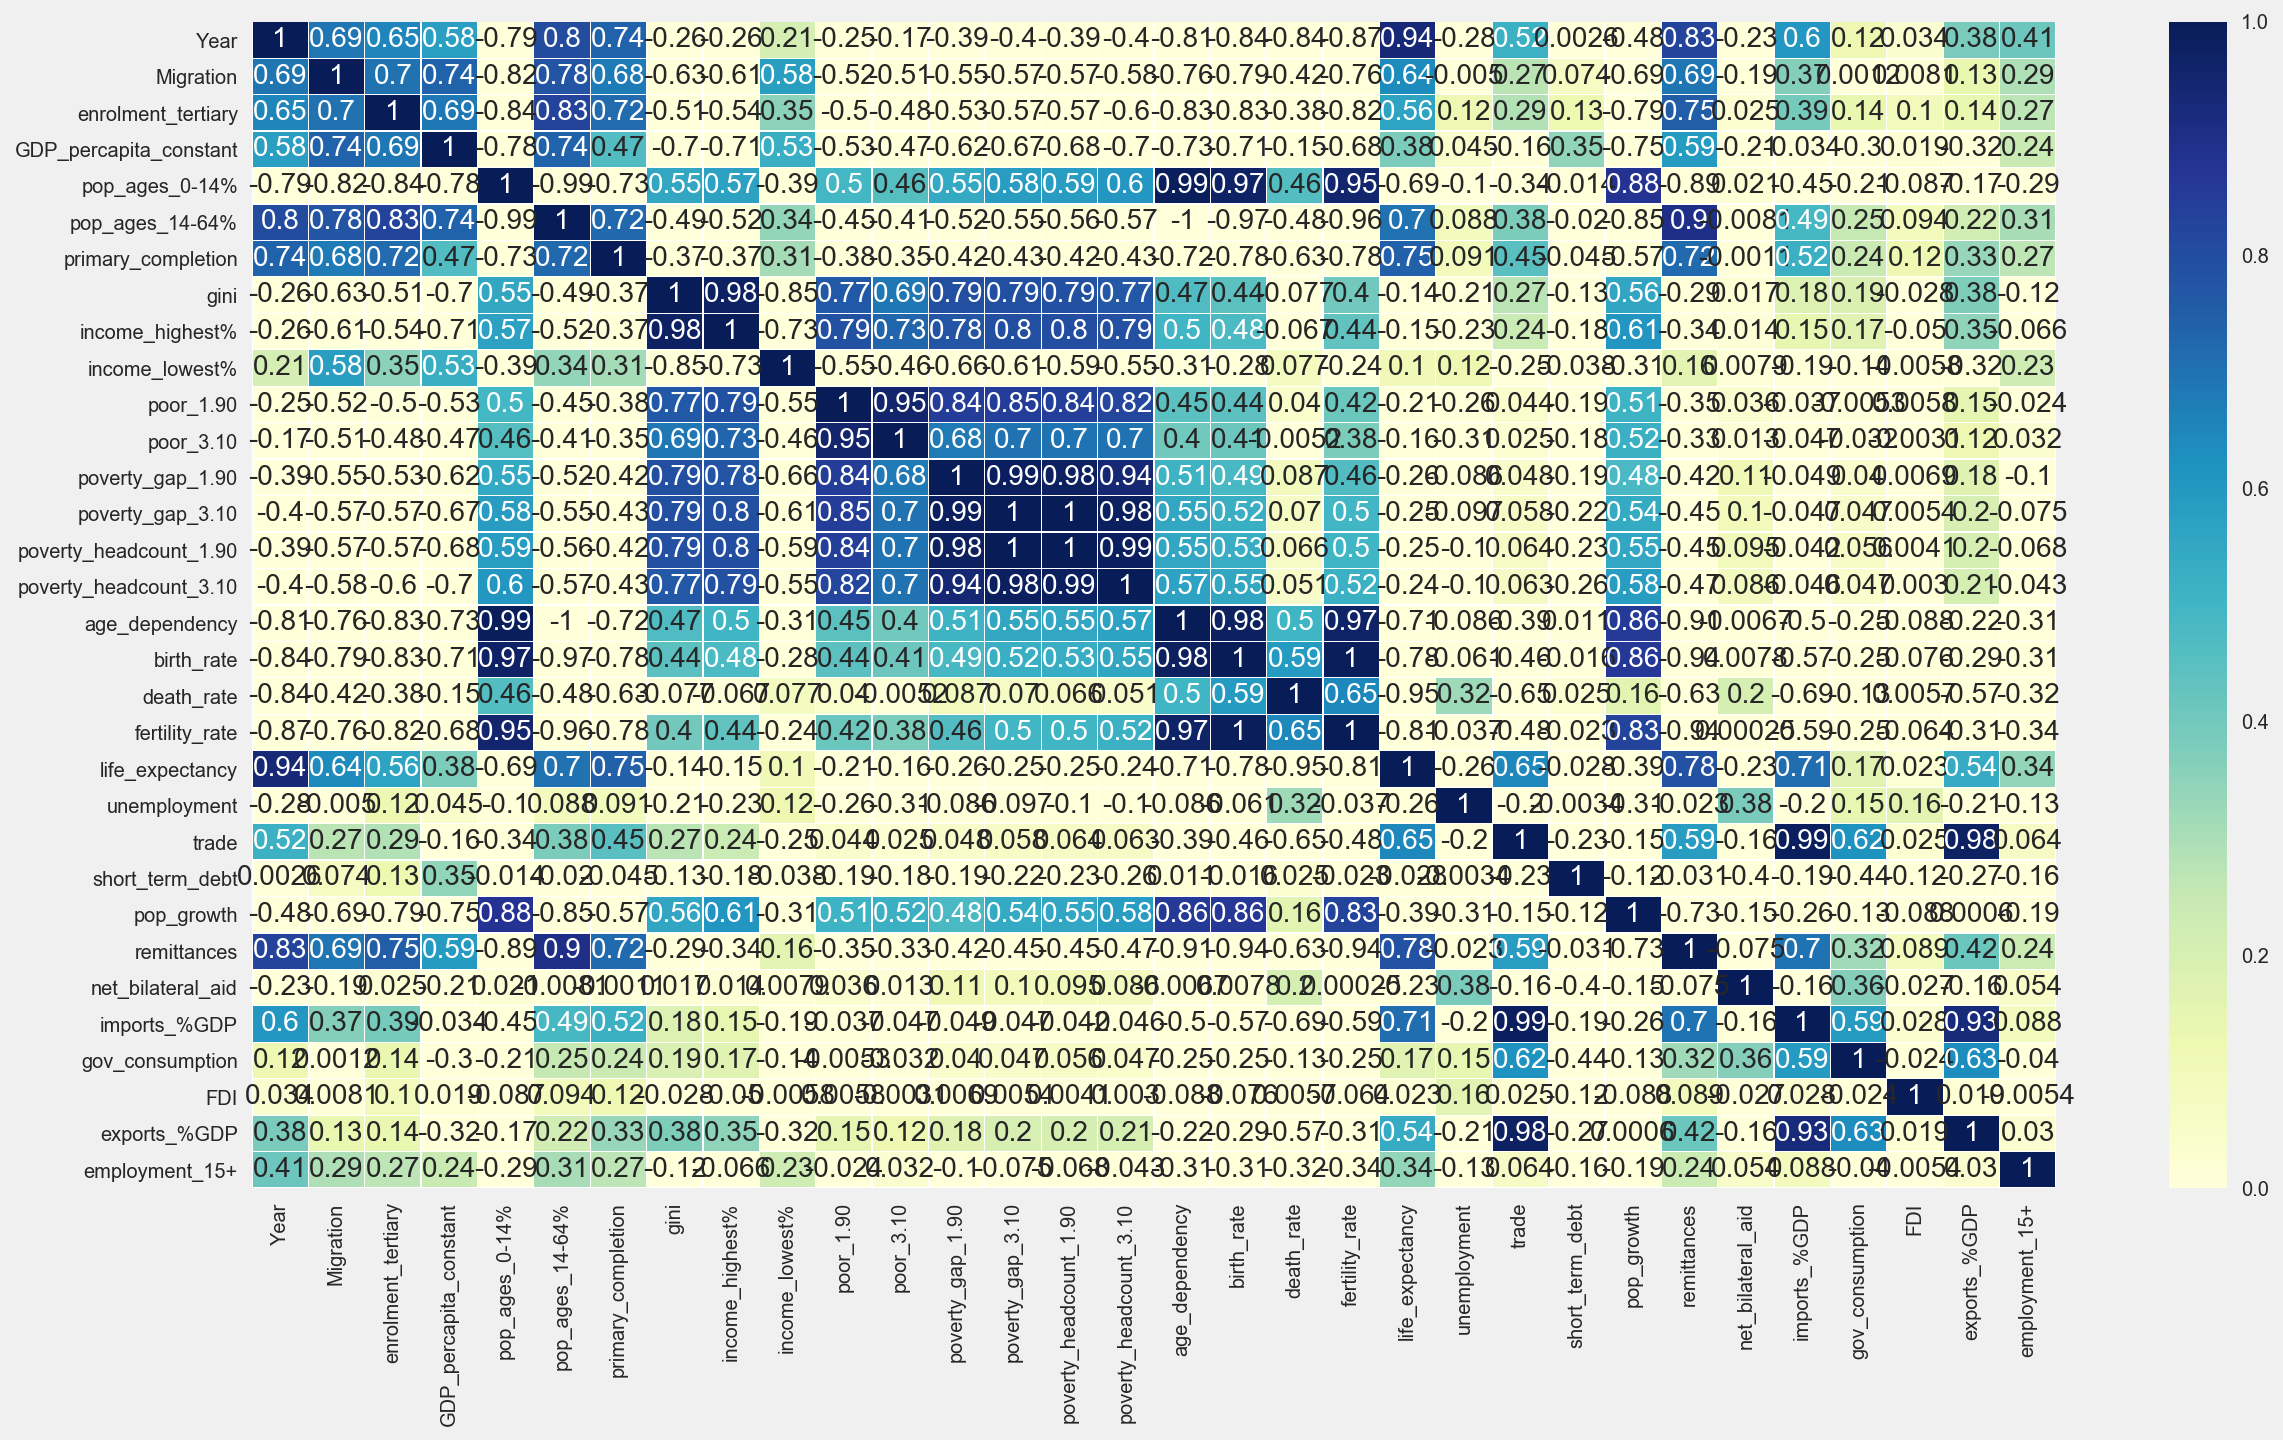

In [223]:
fig = plt.figure(figsize=(18,10))
ax = fig.gca()
sns.heatmap(migration_flows.corr(), annot=True, linewidths=.15, cmap="YlGnBu", vmin=0, vmax=1, ax=ax)
plt.show()

In [224]:
migration_flows.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 108 entries, 0 to 107
Data columns (total 33 columns):
Year                      108 non-null int64
Country                   108 non-null object
Migration                 108 non-null float64
enrolment_tertiary        108 non-null float64
GDP_percapita_constant    108 non-null float64
pop_ages_0-14%            108 non-null float64
pop_ages_14-64%           108 non-null float64
primary_completion        108 non-null float64
gini                      108 non-null float64
income_highest%           108 non-null float64
income_lowest%            108 non-null float64
poor_1.90                 108 non-null float64
poor_3.10                 108 non-null float64
poverty_gap_1.90          108 non-null float64
poverty_gap_3.10          108 non-null float64
poverty_headcount_1.90    108 non-null float64
poverty_headcount_3.10    108 non-null float64
age_dependency            108 non-null float64
birth_rate                108 non-null float64
death

# Model 

### We drop variables with high correlation

In [228]:
del migration_flows['enrolment_tertiary']
del migration_flows['pop_ages_0-14%']
del migration_flows['pop_ages_14-64%']
del migration_flows['primary_completion']
del migration_flows['gini']
del migration_flows['poor_1.90']
del migration_flows['poor_3.10']
del migration_flows['poverty_gap_1.90']
del migration_flows['poverty_gap_3.10']
del migration_flows['poverty_headcount_3.10']
del migration_flows['age_dependency']
del migration_flows['birth_rate']
del migration_flows['fertility_rate']
del migration_flows['life_expectancy']
del migration_flows['short_term_debt']
del migration_flows['gov_consumption']
del migration_flows['employment_15+']
del migration_flows['imports_%GDP']
del migration_flows['exports_%GDP']

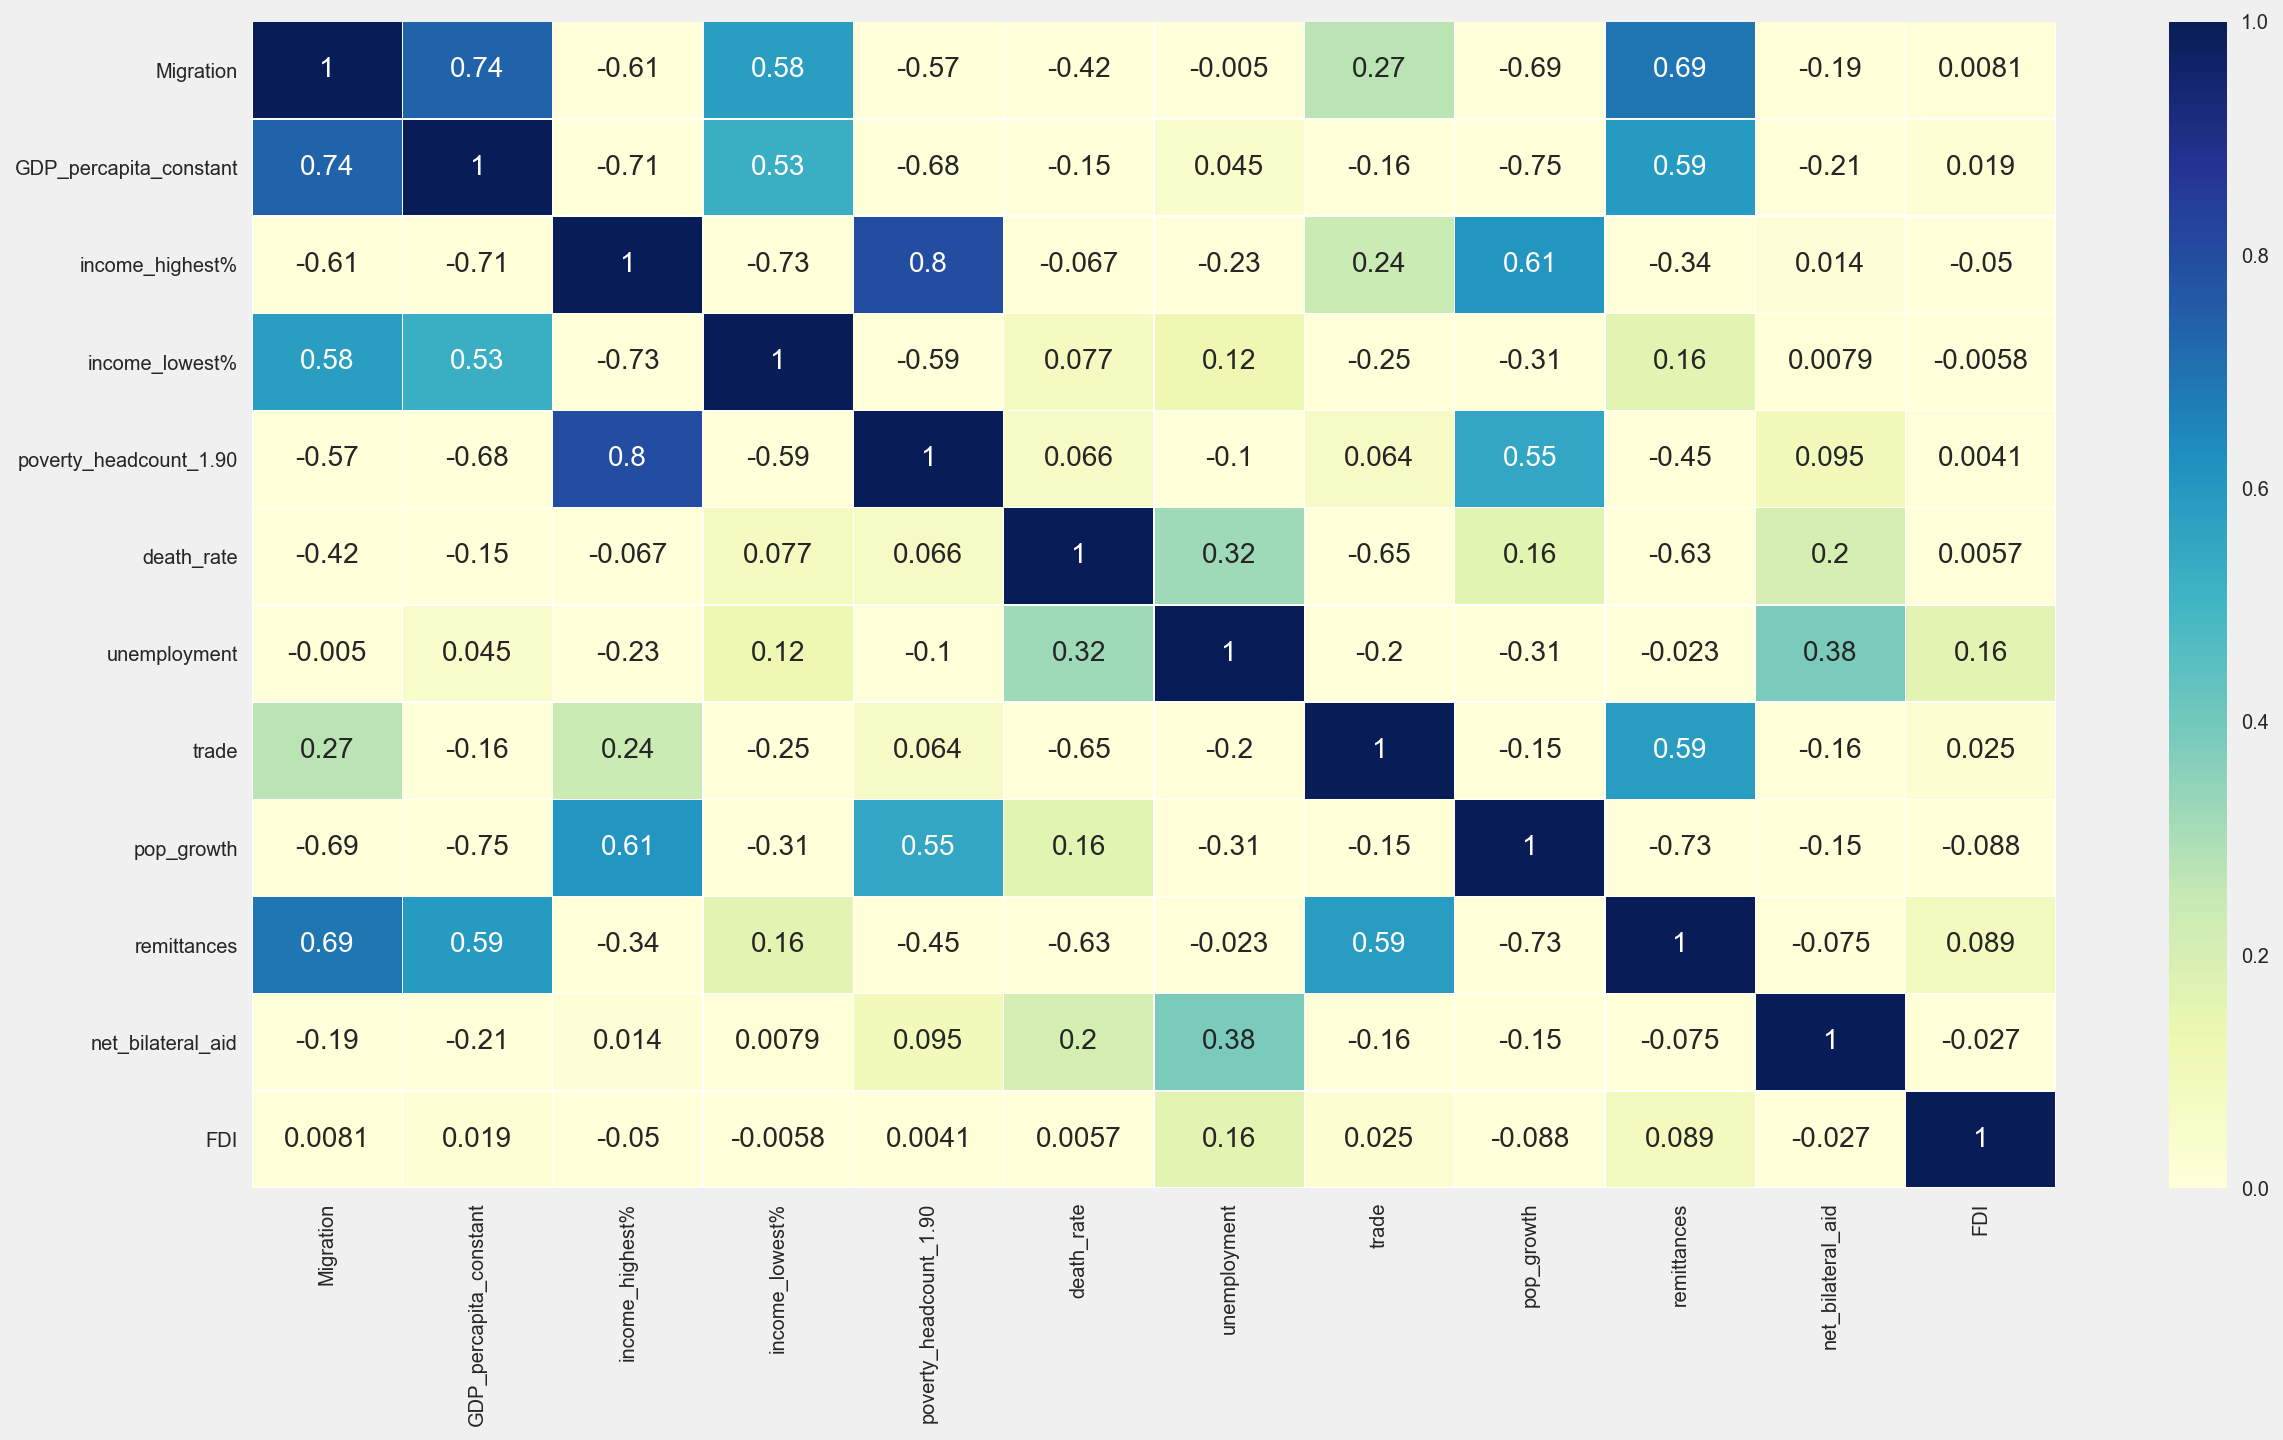

In [229]:
fig = plt.figure(figsize=(18,10))
ax = fig.gca()
sns.heatmap(migration_flows.corr(), annot=True, linewidths=.15, cmap="YlGnBu", vmin=0, vmax=1, ax=ax)
plt.show()

In [230]:
migration_flows.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 108 entries, 0 to 107
Data columns (total 14 columns):
Year                      108 non-null datetime64[ns]
Country                   108 non-null object
Migration                 108 non-null float64
GDP_percapita_constant    108 non-null float64
income_highest%           108 non-null float64
income_lowest%            108 non-null float64
poverty_headcount_1.90    108 non-null float64
death_rate                108 non-null float64
unemployment              108 non-null float64
trade                     108 non-null float64
pop_growth                108 non-null float64
remittances               108 non-null float64
net_bilateral_aid         108 non-null int64
FDI                       108 non-null float64
dtypes: datetime64[ns](1), float64(11), int64(1), object(1)
memory usage: 12.7+ KB


### We define a new variable for time variation

In [231]:
migration_flows['Year'] = pd.to_datetime(migration_flows['Year'])

In [232]:
migration_flows.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 108 entries, 0 to 107
Data columns (total 14 columns):
Year                      108 non-null datetime64[ns]
Country                   108 non-null object
Migration                 108 non-null float64
GDP_percapita_constant    108 non-null float64
income_highest%           108 non-null float64
income_lowest%            108 non-null float64
poverty_headcount_1.90    108 non-null float64
death_rate                108 non-null float64
unemployment              108 non-null float64
trade                     108 non-null float64
pop_growth                108 non-null float64
remittances               108 non-null float64
net_bilateral_aid         108 non-null int64
FDI                       108 non-null float64
dtypes: datetime64[ns](1), float64(11), int64(1), object(1)
memory usage: 12.7+ KB


### We have reduced the correlation in our dataset, now we want to see which are our best predictors for migration. We revise our variables one last time.

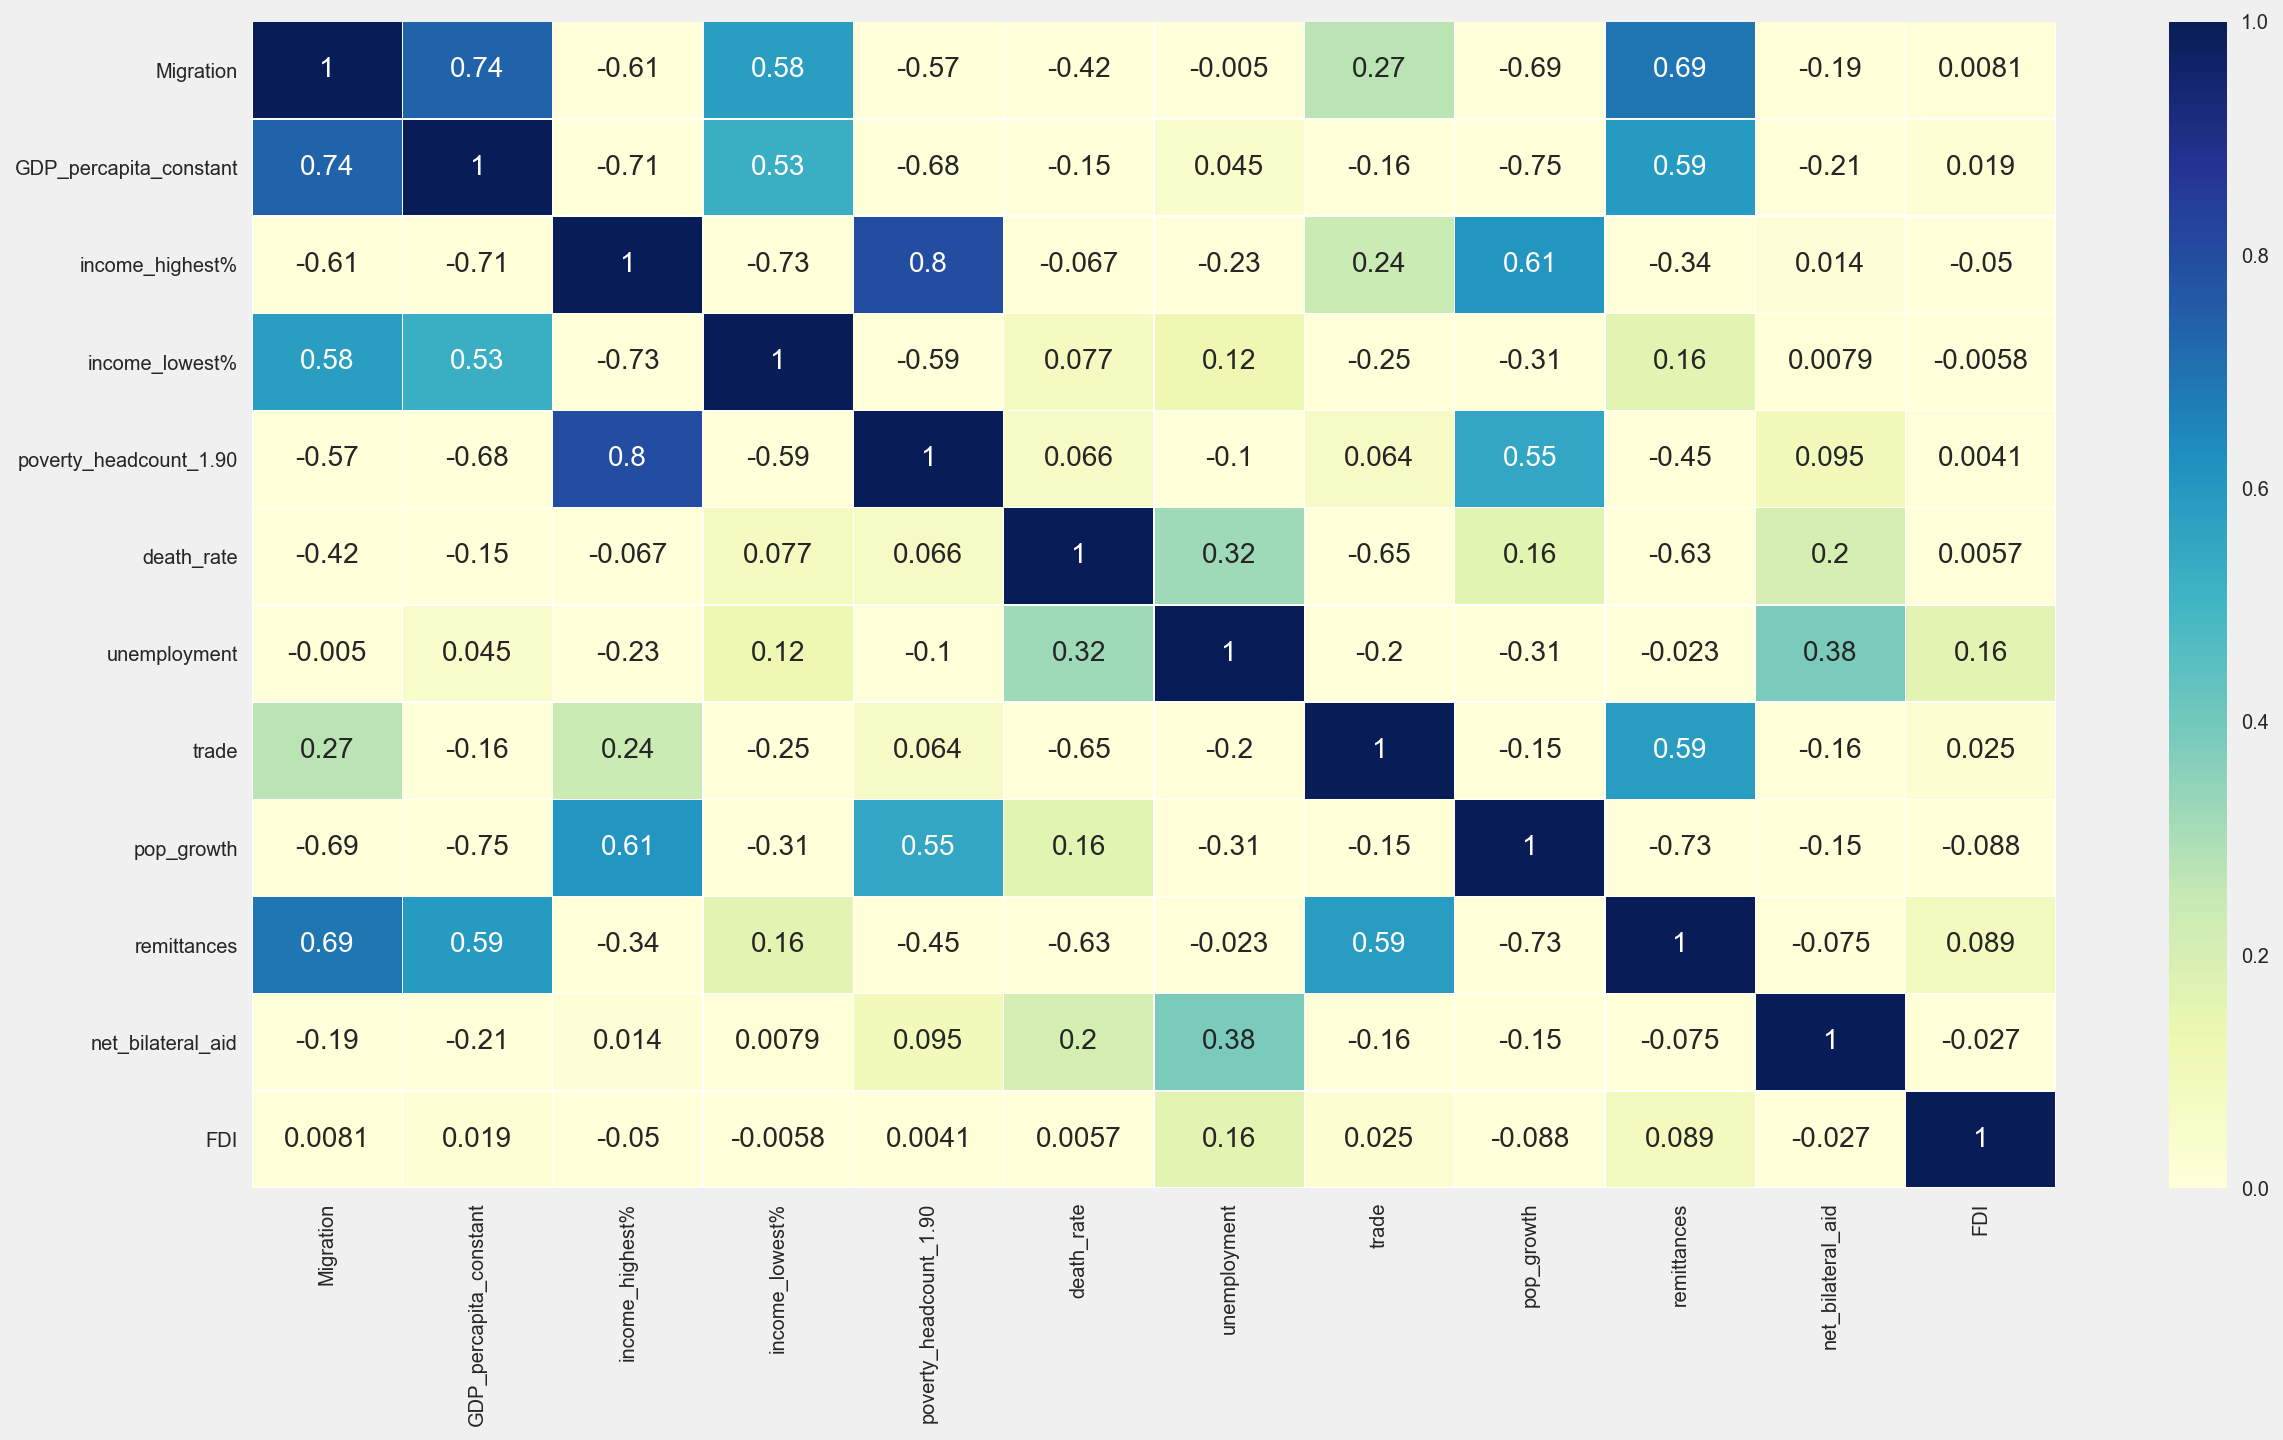

In [233]:
fig = plt.figure(figsize=(18,10))
ax = fig.gca()
sns.heatmap(migration_flows.corr(), annot=True, linewidths=.15, cmap="YlGnBu", vmin=0, vmax=1, ax=ax)
plt.show()

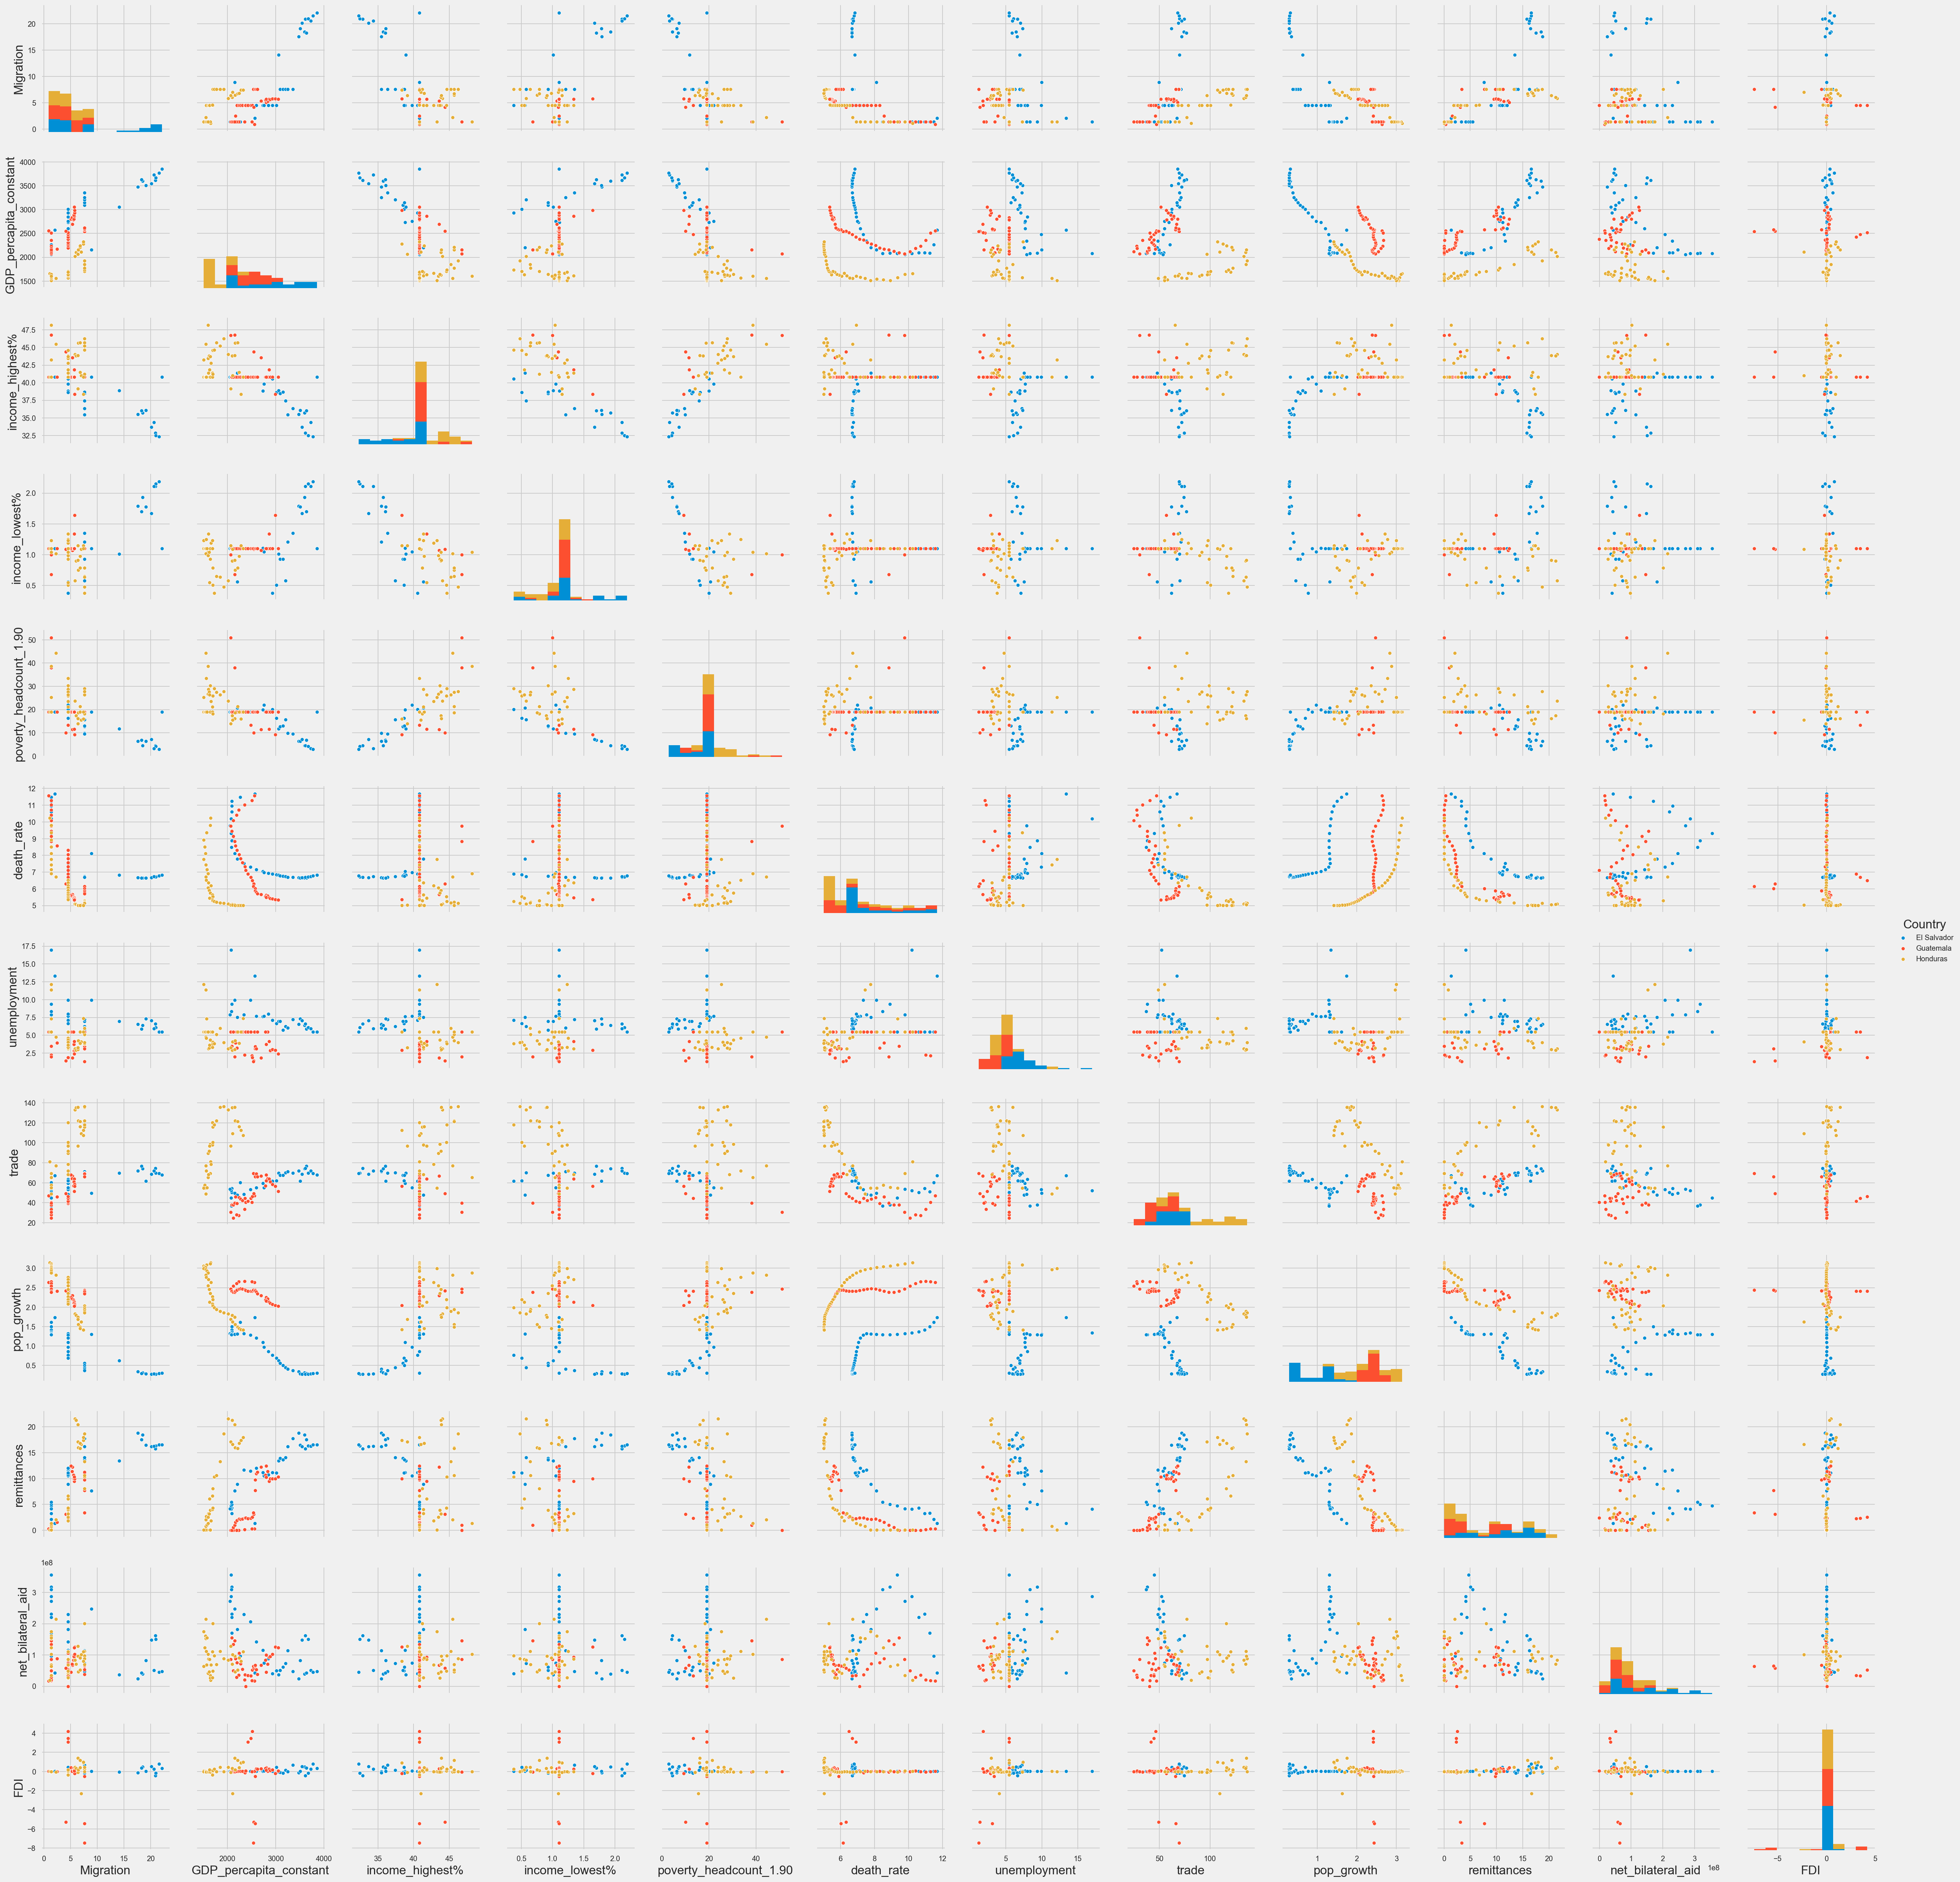

In [234]:
sns.pairplot(migration_flows, hue="Country", plot_kws={"s": 25}, size = 3)

# 3. Predictions

In [235]:
y = migration_flows.Migration.values
x = migration_flows[['GDP_percapita_constant', 'income_highest%', 'income_lowest%', 'poverty_headcount_1.90', 'death_rate', 'unemployment', 'trade', 'pop_growth', 'remittances', 'net_bilateral_aid', 'FDI']]

In [236]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
Xn = ss.fit_transform(x)

In [237]:
from sklearn.cross_validation import train_test_split
x_train, x_test, y_train, y_test = train_test_split(Xn, y, test_size=0.3, random_state=10)
print x_train.shape, x_test.shape
print "\n======\n"
print y_train.shape, y_test.shape

(75, 11) (33, 11)


(75,) (33,)


# 4. Linear and Maching Learning Models

### 4.1 OLS

In [238]:
from sklearn.linear_model import LinearRegression

## define a linear regression model
lr = LinearRegression()

## fit your model
lr.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [239]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [240]:
''' Function that calls the MSE and R^2 at once, using the name of the method and calling the best model'''

def rsquare_meansquare_error(train_y, test_y, train_x, test_x, test, best_model):
    """ first we need to predict on the test and train data"""
    y_train_pred = best_model.predict(train_x)
    y_test_pred = best_model.predict(test_x)
    
    """ We call the MSE in the following lines"""
    print ('MSE ' + test + ' train data: %.2f, test data: %.2f' % (
        mean_squared_error(train_y, y_train_pred),
        mean_squared_error(test_y, y_test_pred)))
    
    """ We call the R^2 in the following lines"""
    print('R^2 ' + test + ' train data: %.2f, test data: %.2f' % (
        r2_score(train_y, y_train_pred),
        r2_score(test_y, y_test_pred)))

In [241]:
rsquare_meansquare_error(y_train, y_test, x_train, x_test, "OLS", lr)

MSE OLS train data: 4.49, test data: 5.22
R^2 OLS train data: 0.85, test data: 0.72


### 4.2 Regularization

In [242]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet, RidgeCV, LassoCV, ElasticNetCV

### 4.2.1 Ridge

In [243]:
## Find the optimal alpha
ridge_alphas = np.logspace(0, 5, 100)
optimal_ridge = RidgeCV(alphas=ridge_alphas, cv=10)
optimal_ridge.fit(x_train, y_train)
print (optimal_ridge.alpha_)

11.497569954


In [244]:
## Implement the Ridge Regression
ridge = Ridge(alpha=optimal_ridge.alpha_)

## Fit the Ridge regression
ridge.fit(x_train, y_train)

Ridge(alpha=11.497569953977356, copy_X=True, fit_intercept=True,
   max_iter=None, normalize=False, random_state=None, solver='auto',
   tol=0.001)

In [245]:
## Evaluate the Ridge Regression
rsquare_meansquare_error(y_train, y_test, x_train, x_test, "Ridge", ridge)

MSE Ridge train data: 4.84, test data: 5.37
R^2 Ridge train data: 0.84, test data: 0.71


### 4.2.2 Lasso

In [246]:
## Find the optimal alpha
optimal_lasso = LassoCV(n_alphas=300, cv=10, verbose=1)
optimal_lasso.fit(x_train, y_train)
print optimal_lasso.alpha_

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

0.0282291816094


............................................................................................................[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.8s finished


In [247]:
## Implement the Lasso Regression
lasso = Lasso(alpha=optimal_lasso.alpha_)

## fit your regression
lasso.fit(x_train, y_train)

Lasso(alpha=0.028229181609392653, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=False, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [248]:
## Evaluate the Lasso Regression
rsquare_meansquare_error(y_train, y_test, x_train, x_test, "Lasso", lasso)

MSE Lasso train data: 4.50, test data: 5.17
R^2 Lasso train data: 0.85, test data: 0.72


### 4.2.3 Elastic Net

In [249]:
## Find the optimal alphas
l1_ratios = np.linspace(0.01, 1.0, 50)
optimal_enet = ElasticNetCV(l1_ratio=l1_ratios, n_alphas=300, cv=5, verbose=1)
optimal_enet.fit(x_train, y_train)
print optimal_enet.alpha_
print optimal_enet.l1_ratio_

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

0.064443056188
0.070612244898


[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed:   19.6s finished


In [250]:
##  Create a model Enet
enet = ElasticNet(alpha=optimal_enet.alpha_, l1_ratio=optimal_enet.l1_ratio_)

## Fit your model
enet.fit(x_train, y_train)

ElasticNet(alpha=0.064443056188017989, copy_X=True, fit_intercept=True,
      l1_ratio=0.070612244897959184, max_iter=1000, normalize=False,
      positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [251]:
## Evaluate the Elastic Net Regression
rsquare_meansquare_error(y_train, y_test, x_train, x_test, "Elastic Net", enet)

MSE Elastic Net train data: 4.60, test data: 5.27
R^2 Elastic Net train data: 0.84, test data: 0.71


### Best Predictors

In [252]:
''' Here I am defining a function to print the coefficients, their absolute values and the non-absolute values'''
def best_reg_method(x, best_regulari):
    method_coefs = pd.DataFrame({'variable':x.columns, 
                                 'coef':best_regulari.coef_, 
                                 'abs_coef':np.abs(best_regulari.coef_)})
    method_coefs.sort_values('abs_coef', inplace=True, ascending=False)
    '''you can change the number inside head to display more or less variables'''
    return method_coefs.head(10)

In [253]:
best_reg_method(x, ridge)

abs_coef      coef                variable
2   1.740302  1.740302          income_lowest%
0   1.326838  1.326838  GDP_percapita_constant
7   1.202375 -1.202375              pop_growth
4   0.729386 -0.729386              death_rate
6   0.669221  0.669221                   trade
8   0.668478  0.668478             remittances
9   0.584685 -0.584685       net_bilateral_aid
1   0.546543 -0.546543         income_highest%
3   0.307262  0.307262  poverty_headcount_1.90
10  0.184696 -0.184696                     FDI

### With ridge our best predictors are related to economic performance, inequality , population growth, death rates and trade

In [254]:
best_reg_method(x, lasso)

abs_coef      coef                variable
2   2.253235  2.253235          income_lowest%
7   1.783755 -1.783755              pop_growth
0   1.584851  1.584851  GDP_percapita_constant
6   0.989429  0.989429                   trade
4   0.912235 -0.912235              death_rate
9   0.696059 -0.696059       net_bilateral_aid
3   0.672069  0.672069  poverty_headcount_1.90
1   0.244444 -0.244444         income_highest%
10  0.168705 -0.168705                     FDI
5   0.045264 -0.045264            unemployment

### We find similar results with lasso

In [255]:
best_reg_method(x, enet)

abs_coef      coef                variable
2   2.014602  2.014602          income_lowest%
0   1.456899  1.456899  GDP_percapita_constant
7   1.445306 -1.445306              pop_growth
6   0.810558  0.810558                   trade
4   0.801342 -0.801342              death_rate
9   0.650087 -0.650087       net_bilateral_aid
3   0.584547  0.584547  poverty_headcount_1.90
1   0.469064 -0.469064         income_highest%
8   0.429958  0.429958             remittances
10  0.193813 -0.193813                     FDI

### We find similar results with elastic net

### 4.3 Regression Tree

In [256]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()

## Here is the gridsearch
params = {"max_depth": [3,5,10,20],
          "max_features": [None, "auto"],
          "min_samples_leaf": [1, 3, 5, 7, 10],
          "min_samples_split": [2, 5, 7],
           "criterion" : ['mse']
         }

# ## Here crossvalidate 
from sklearn.grid_search import GridSearchCV
dtr_gs = GridSearchCV(dtr, params, n_jobs=-1, cv=5, verbose=1)

In [257]:
## Fit the regresion tree
dtr_gs.fit(x_train, y_train)

Fitting 5 folds for each of 120 candidates, totalling 600 fits


[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed:    1.3s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best'),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'max_features': [None, 'auto'], 'min_samples_split': [2, 5, 7], 'criterion': ['mse'], 'max_depth': [3, 5, 10, 20], 'min_samples_leaf': [1, 3, 5, 7, 10]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=1)

In [258]:
## Print Best Estimator, parameters and score
''' dtr_best = is the regression tree regressor with best parameters/estimators'''
dtr_best = dtr_gs.best_estimator_ 

print "best estimator", dtr_best
print "\n==========\n"
print "best parameters",  dtr_gs.best_params_
print "\n==========\n"
print "best score", dtr_gs.best_score_

best estimator DecisionTreeRegressor(criterion='mse', max_depth=5, max_features='auto',
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best')


best parameters {'max_features': 'auto', 'min_samples_split': 2, 'criterion': 'mse', 'max_depth': 5, 'min_samples_leaf': 1}


best score 0.885738615734


In [259]:
##features that best explain your Y
''' Here I am defining a function to print feature importance using best models'''
def feature_importance(x, best_model):
    feature_importance = pd.DataFrame({'feature':x.columns, 'importance':best_model.feature_importances_})
    feature_importance.sort_values('importance', ascending=False, inplace=True)
    return feature_importance  

In [260]:
feature_importance(x, dtr_best)

feature    importance
0   GDP_percapita_constant  8.039375e-01
8              remittances  1.250507e-01
9        net_bilateral_aid  3.330661e-02
4               death_rate  2.985446e-02
6                    trade  6.407658e-03
7               pop_growth  1.004094e-03
10                     FDI  3.731590e-04
3   poverty_headcount_1.90  6.509575e-05
5             unemployment  7.798122e-07
1          income_highest%  0.000000e+00
2           income_lowest%  0.000000e+00

### With regression tree, the findings suggest that remmitances and billateral aid are also relevant predictors.

In [261]:
## Predict 
y_pred_dtr= dtr_best.predict(x_test)
y_pred_dtr

array([  6.97976052,  19.09690622,   6.97976052,   4.97569521,
         1.34203879,   2.22139377,   4.97569521,   6.97976052,
         1.34203879,   7.56872769,   1.34203879,   2.26399794,
         4.97569521,   1.34203879,   6.97976052,   4.47564148,
         6.97976052,   7.56872769,   4.97569521,   6.97976052,
         1.34203879,   4.47564148,   4.97569521,   1.34203879,
        20.94549073,   7.56872769,   4.47564148,   6.97976052,
         6.97976052,   4.97569521,   4.97569521,   7.56872769,   6.97976052])

In [262]:
## Evaluate the Regression Tree performance on your train and test data
rsquare_meansquare_error(y_train, y_test, x_train, x_test, "Regression tree", dtr_best)

MSE Regression tree train data: 0.19, test data: 1.55
R^2 Regression tree train data: 0.99, test data: 0.92


### Our R2 is too high we may still have some isssues with correlation among our predictors

### 4.4 Random Forrest

In [263]:
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor( )

params = {'max_depth':[3,4,5],  
          'max_leaf_nodes':[5,6,7], 
          'min_samples_split':[3,4],
          'n_estimators': [100]
         }

estimator_rfr = GridSearchCV(forest, params, n_jobs=-1,  cv=5,verbose=1)

In [264]:
## Fit your random forest tree
estimator_rfr.fit(x_train, y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    8.1s
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:   16.2s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'min_samples_split': [3, 4], 'max_leaf_nodes': [5, 6, 7], 'n_estimators': [100], 'max_depth': [3, 4, 5]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=1)

In [265]:
## Print the best estimator, parameters and score
''' rfr_best = is the random forest regression tree regressor with best parameters/estimators'''
rfr_best = estimator_rfr.best_estimator_
print "best estimator", rfr_best
print "\n==========\n"
print "best parameters", estimator_rfr.best_params_
print "\n==========\n"
print "best score", estimator_rfr.best_score_

best estimator RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=5,
           max_features='auto', max_leaf_nodes=7, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=3,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)


best parameters {'min_samples_split': 3, 'max_leaf_nodes': 7, 'n_estimators': 100, 'max_depth': 5}


best score 0.879425646607


In [266]:
## Print the feauure importance
feature_importance(x, rfr_best)

feature  importance
0   GDP_percapita_constant    0.504375
7               pop_growth    0.237784
8              remittances    0.088999
4               death_rate    0.076235
3   poverty_headcount_1.90    0.040469
9        net_bilateral_aid    0.018331
2           income_lowest%    0.017777
1          income_highest%    0.008949
6                    trade    0.003667
5             unemployment    0.002310
10                     FDI    0.001104

### Remittances might have some colinearity with the levels of migration and that might be overestimating our R2. Economic performance, population, death rates and inequality are important according to our results.

In [267]:
## Predict
y_pred_rfdtr= rfr_best.predict(x_test)
y_pred_rfdtr

array([  6.7452667 ,  18.92962689,   6.35557839,   5.85822173,
         2.26808502,   3.41398234,   5.77375152,   6.31265132,
         1.49663576,   4.95788407,   1.50335546,   1.89007663,
         5.26840944,   1.54260286,   6.85693493,   4.73685239,
        13.14452424,   4.38669293,   6.56894847,   7.79768882,
         1.82853601,   4.31161426,   5.77664529,   1.82853601,
        20.33043929,   5.08040759,   3.545363  ,   6.78950492,
         6.74578188,   5.50926387,   5.77375152,   5.08040759,   7.47567285])

In [268]:
## Evaluate your model
rsquare_meansquare_error(y_train, y_test, x_train, x_test, "Random Forest Regression tree", rfr_best)

MSE Random Forest Regression tree train data: 0.84, test data: 1.45
R^2 Random Forest Regression tree train data: 0.97, test data: 0.92


### Our findings with random forrest seems to match our expectations about the best predictors from an intuitively point of view. Even though our R2 is still too high, it suggests that remittances might be causing collinearity in our model, based on its high relevance as a predictor.

# 5. PCA

### Now we are going to use PCA and KNN in our estimations.

In [269]:
print migration_flows['Migration'].mean()

5.86008409129


In [270]:
migration_flows['threshold'] = migration_flows['Migration'] >= 5.86008409129

In [271]:
migration_flows['threshold']= migration_flows['threshold'].apply(lambda x: 1 if x== True else 0)

In [272]:
migration_flows

Year      Country  Migration  \
0   1970-01-01 00:00:00.000001980  El Salvador   2.063205   
1   1970-01-01 00:00:00.000001980    Guatemala   0.886027   
2   1970-01-01 00:00:00.000001980     Honduras   1.076884   
3   1970-01-01 00:00:00.000001981  El Salvador   1.342039   
4   1970-01-01 00:00:00.000001981    Guatemala   1.342039   
5   1970-01-01 00:00:00.000001981     Honduras   1.342039   
6   1970-01-01 00:00:00.000001982  El Salvador   1.342039   
7   1970-01-01 00:00:00.000001982    Guatemala   1.342039   
8   1970-01-01 00:00:00.000001982     Honduras   1.342039   
9   1970-01-01 00:00:00.000001983  El Salvador   1.342039   
10  1970-01-01 00:00:00.000001983    Guatemala   1.342039   
11  1970-01-01 00:00:00.000001983     Honduras   1.342039   
12  1970-01-01 00:00:00.000001984  El Salvador   1.342039   
13  1970-01-01 00:00:00.000001984    Guatemala   1.342039   
14  1970-01-01 00:00:00.000001984     Honduras   1.342039   
15  1970-01-01 00:00:00.000001985  El Salvador   1.342039   
16  1970-01-01 00:00:00.000001985    Guatemala   1.342039   
17  1970-01-01 00:00:00.000001985     Honduras   1.342039   
18  1970-01-01 00:00:00.000001986  El Salvador   1.342039   
19  1970-01-01 00:00:00.000001986    Guatemala   1.342039   
20  1970-01-01 00:00:00.000001986     Honduras   1.342039   
21  1970-01-01 00:00:00.000001987  El Salvador   1.342039   
22  1970-01-01 00:00:00.000001987    Guatemala   1.342039   
23  1970-01-01 00:00:00.000001987     Honduras   1.342039   
24  1970-01-01 00:00:00.000001988  El Salvador   1.342039   
25  1970-01-01 00:00:00.000001988    Guatemala   1.342039   
26  1970-01-01 00:00:00.000001988     Honduras   1.342039   
27  1970-01-01 00:00:00.000001989  El Salvador   1.342039   
28  1970-01-01 00:00:00.000001989    Guatemala   1.342039   
29  1970-01-01 00:00:00.000001989     Honduras   1.342039   
..                            ...          ...        ...   
78  1970-01-01 00:00:00.000002006  El Salvador  17.546949   
79  1970-01-01 00:00:00.000002006    Guatemala   5.343950   
80  1970-01-01 00:00:00.000002006     Honduras   5.783592   
81  1970-01-01 00:00:00.000002007  El Salvador  18.448273   
82  1970-01-01 00:00:00.000002007    Guatemala   5.077445   
83  1970-01-01 00:00:00.000002007     Honduras   6.034761   
84  1970-01-01 00:00:00.000002008  El Salvador  18.237120   
85  1970-01-01 00:00:00.000002008    Guatemala   5.240451   
86  1970-01-01 00:00:00.000002008     Honduras   6.339264   
87  1970-01-01 00:00:00.000002009  El Salvador  19.096906   
88  1970-01-01 00:00:00.000002009    Guatemala   5.539466   
89  1970-01-01 00:00:00.000002009     Honduras   6.338030   
90  1970-01-01 00:00:00.000002010  El Salvador  20.105788   
91  1970-01-01 00:00:00.000002010    Guatemala   5.639487   
92  1970-01-01 00:00:00.000002010     Honduras   6.964149   
93  1970-01-01 00:00:00.000002011  El Salvador  20.886863   
94  1970-01-01 00:00:00.000002011    Guatemala   5.653971   
95  1970-01-01 00:00:00.000002011     Honduras   6.437598   
96  1970-01-01 00:00:00.000002012  El Salvador  20.945491   
97  1970-01-01 00:00:00.000002012    Guatemala   5.586203   
98  1970-01-01 00:00:00.000002012     Honduras   6.743448   
99  1970-01-01 00:00:00.000002013  El Salvador  20.560594   
100 1970-01-01 00:00:00.000002013    Guatemala   5.750461   
101 1970-01-01 00:00:00.000002013     Honduras   6.798242   
102 1970-01-01 00:00:00.000002014  El Salvador  21.537939   
103 1970-01-01 00:00:00.000002014    Guatemala   5.716933   
104 1970-01-01 00:00:00.000002014     Honduras   7.389157   
105 1970-01-01 00:00:00.000002015  El Salvador  22.073593   
106 1970-01-01 00:00:00.000002015    Guatemala   5.675817   
107 1970-01-01 00:00:00.000002015     Honduras   7.418273   

     GDP_percapita_constant  income_highest%  income_lowest%  \
0               2572.813235        40.809231        1.104423   
1               2560.782037        40.809231        1.104423   
2               1655.946421        40.809231        1.

In [273]:
migration_flows.threshold.value_counts()

0    72
1    36
Name: threshold, dtype: int64

### Subset of the data without the threshold

In [274]:
migration_cont = migration_flows.iloc[:, 3:-1]

In [275]:
migration_cont

GDP_percapita_constant  income_highest%  income_lowest%  \
0               2572.813235        40.809231        1.104423   
1               2560.782037        40.809231        1.104423   
2               1655.946421        40.809231        1.104423   
3               2267.095959        40.809231        1.104423   
4               2509.736778        40.809231        1.104423   
5               1645.846419        40.809231        1.104423   
6               2092.554425        40.809231        1.104423   
7               2357.368296        40.809231        1.104423   
8               1573.671559        40.809231        1.104423   
9               2094.864582        40.809231        1.104423   
10              2236.567544        40.809231        1.104423   
11              1512.185833        40.809231        1.104423   
12              2094.098791        40.809231        1.104423   
13              2189.829730        40.809231        1.104423   
14              1530.695403        40.809231        1.104423   
15              2078.900486        40.809231        1.104423   
16              2121.873660        40.809231        1.104423   
17              1547.357836        40.809231        1.104423   
18              2055.438830        40.809231        1.104423   
19              2073.066614        46.730000        1.000000   
20              1512.507552        43.260000        1.230000   
21              2079.844180        40.809231        1.104423   
22              2095.342199        40.809231        1.104423   
23              1556.855276        40.809231        1.104423   
24              2091.693100        40.809231        1.104423   
25              2125.624163        40.809231        1.104423   
26              1581.639092        40.809231        1.104423   
27              2084.671422        40.809231        1.104423   
28              2157.313890        46.780000        0.680000   
29              1603.219717        48.180000        1.040000   
..                      ...              ...             ...   
78              3475.866745        35.480000        1.790000   
79              2698.985240        43.560000        1.070000   
80              2017.943010        44.050000        0.580000   
81              3597.961991        35.720000        1.930000   
82              2805.169791        40.809231        1.104423   
83              2104.759589        43.810000        0.900000   
84              3633.014903        36.040000        1.700000   
85              2833.735795        40.809231        1.104423   
86              2155.827865        43.870000        0.910000   
87              3509.156436        36.070000        1.780000   
88              2787.128287        40.809231        1.104423   
89              2068.185180        39.140000        1.150000   
90              3547.070983        33.700000        1.670000   
91              2805.951416        40.809231        1.104423   
92              2110.822021        41.020000        1.090000   
93              3615.583230        32.860000        2.110000   
94              2861.167894        41.830000        1.340000   
95              2157.984444        45.670000        0.750000   
96              3673.262887        32.470000        2.150000   
97              2884.897429        40.809231        1.104423   
98              2213.759527        45.680000        0.790000   
99              3730.422292        34.350000        2.110000   
100             2930.170750        40.809231        1.104423   
101             2242.818455        41.480000        0.980000   
102             3772.401570        32.310000        2.190000   
103             2990.594485        38.360000        1.640000   
104             2279.309902        38.360000        1.150000   
105             3853.107631        40.809231        1.104423   
106             3052.270569        40.809231        1.104423   
107             2329.002149        40.809231        1.104423   

     poverty_headcount_1.90  death_r

### Standardize the variables

In [276]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
migration_cont_n = ss.fit_transform(migration_cont)
migration_cont_n

array([[  3.09990924e-01,   2.49079191e-15,  -6.78250390e-16, ...,
         -1.03044645e+00,  -7.97539512e-01,   1.39632884e-17],
       [  2.90287283e-01,   2.49079191e-15,  -6.78250390e-16, ...,
         -1.19160228e+00,  -1.16667096e+00,   9.07069956e-03],
       [ -1.19157316e+00,   2.49079191e-15,  -6.78250390e-16, ...,
         -1.23348589e+00,  -1.13827623e+00,   2.00066728e-02],
       ..., 
       [  2.40674484e+00,   2.49079191e-15,  -6.78250390e-16, ...,
          1.32657722e+00,  -7.34077298e-01,   2.67908201e-01],
       [  1.09520411e+00,   2.49079191e-15,  -6.78250390e-16, ...,
          3.53999624e-01,   3.45348233e-01,   2.84966462e-02],
       [ -8.93014977e-02,   2.49079191e-15,  -6.78250390e-16, ...,
          1.53987595e+00,   1.59078827e-01,   7.92117484e-01]])

### Fit a PCA on the standardized data

In [277]:
## Fit the PCA and print the components
from sklearn.decomposition import PCA
migration_pca = PCA().fit(migration_cont_n)
print "Number of PCA components is: \n", migration_pca.n_components_
print "\n======\n"
print "List of PCA components is:\n", migration_pca.components_

Number of PCA components is: 
11


List of PCA components is:
[[  4.44953785e-01  -4.33783948e-01   3.34104401e-01  -4.24088228e-01
   -1.06912171e-01   9.48163627e-02   1.37408511e-02  -4.19167628e-01
    3.51743673e-01  -3.09566472e-02   3.71274547e-02]
 [ -1.21666677e-02   2.08096986e-01  -2.33634354e-01   7.65655577e-02
   -5.38365104e-01  -3.05100519e-01   5.50558972e-01  -5.63939732e-02
    3.96597653e-01  -2.22691862e-01  -4.28025433e-04]
 [ -1.48957745e-01   1.06678958e-01  -2.21507866e-01   1.50903978e-01
   -6.02258276e-03   5.57226489e-01   1.98828498e-01  -3.10661936e-01
    2.04701578e-01   5.77502700e-01   2.69444055e-01]
 [ -3.77536854e-02   1.75339147e-02   2.85664035e-02  -2.71247993e-02
   -6.39828471e-02  -3.73895302e-02   4.62671591e-02  -7.30312143e-02
    4.20089511e-02   3.94499973e-01  -9.09040404e-01]
 [  3.48318407e-01   1.49689192e-01  -5.76707332e-01   1.23864812e-01
    2.74527548e-01   2.22756631e-01  -1.79594534e-01  -3.23647293e-01
    7.19247322e-02  -4

In [278]:
## transform  => Apply dimensionality reduction to X.
migration_pcs = migration_pca.transform(migration_cont_n)
migration_pcs

array([[-0.09475011, -2.55902429,  1.13077881, ...,  0.46564207,
         0.03408878,  0.69305284],
       [-0.91575677, -1.98239954, -1.4239706 , ...,  0.36246894,
        -0.35480985,  0.45654761],
       [-1.75284795, -0.93167753, -1.1262195 , ..., -0.01598467,
        -0.32290655,  0.26322268],
       ..., 
       [ 2.36805819,  0.86440093,  0.13611338, ...,  0.38771311,
         0.16832743,  0.30748464],
       [ 0.49046578,  0.62675761, -0.78621404, ...,  0.11704958,
        -0.18836398,  0.30903495],
       [ 0.96671037,  1.8038798 ,  1.53175003, ...,  0.09377444,
        -0.31034041, -0.10472607]])

In [279]:
## Now create the dataframe
migration_pcs = pd.DataFrame(migration_pcs, columns=['PC'+str(i) for i in range(1, migration_pcs.shape[1]+1)])
migration_pcs['threshold'] = migration_flows.threshold

In [280]:
migration_pcs

PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0   -0.094750 -2.559024  1.130779 -0.640239  1.828362  2.409852 -0.045526   
1   -0.915757 -1.982400 -1.423971 -0.787201  1.006300  0.456770 -0.686899   
2   -1.752848 -0.931678 -1.126220 -0.671409 -0.153935  1.499758 -1.110063   
3   -0.540747 -1.759718 -0.162042 -0.185934  0.667831  0.016410 -1.147953   
4   -1.089305 -1.614602 -2.248583 -0.703059  0.659168 -0.483891 -0.992225   
5   -1.730771 -1.095974 -1.060670 -0.607031 -0.237551  1.209526 -0.876000   
6   -0.568150 -2.019582  0.493532  0.244410  0.200131 -0.544758 -1.158457   
7   -1.199071 -1.708567 -2.236150 -0.663807  0.577186 -0.488600 -0.882825   
8   -1.697105 -1.599834 -0.470535 -0.376321 -0.249953  1.295664 -0.422549   
9   -0.531903 -2.055599  1.048910  0.609119 -0.206761 -0.915087 -1.200603   
10  -1.147356 -2.206898 -1.352877 -0.649862  0.702034  0.211710 -0.391360   
11  -1.769911 -1.215291 -0.870798 -0.421142 -0.504485  0.863736 -0.577620   
12  -0.427941 -1.937353  0.989404  0.569404 -0.139926 -0.939164 -1.046679   
13  -1.134854 -2.077429 -1.364454 -0.708813  0.676491  0.266166 -0.331920   
14  -1.750131 -1.232270 -0.386277 -0.002139 -0.909319  0.516002 -0.559029   
15   0.009909 -3.464194  4.222059  0.778410  0.446583  1.659190  0.429358   
16  -1.146214 -2.111590 -1.185993 -0.537097  0.517247  0.107555 -0.267502   
17  -1.723924 -1.293844 -0.085023  0.197953 -1.172703  0.210061 -0.463852   
18  -0.322516 -2.100750  2.014988  0.856887 -0.384499 -0.585060 -0.638002   
19  -3.977446 -1.171330  0.134423 -0.394938  1.238367 -1.018212  2.236757   
20  -2.066231 -1.923692  1.726760  0.192129 -0.693138  1.700350  1.187756   
21  -0.374719 -2.071261  2.100620  1.369580 -1.106210 -1.909042 -0.825242   
22  -1.182717 -1.722051 -0.634126  0.129705 -0.467755 -0.921688 -0.670680   
23  -1.373889 -1.899490  1.229482  0.065273 -0.603294  1.676373  0.571713   
24  -0.151607 -2.441351  2.652865  1.101502 -0.515248 -0.771171 -0.065139   
25  -1.008282 -1.785772 -0.323846  0.015558 -0.156833 -0.294206 -0.286456   
26  -1.539755 -0.920739 -0.076727  0.229274 -1.209815  0.195572 -0.186215   
27  -0.149081 -2.163703  2.356188  1.087927 -0.614977 -1.008840 -0.063041   
28  -3.522453 -0.295340 -0.131563  0.106544  0.795555 -2.155864  0.570972   
29  -3.750821  0.334077  0.305371 -0.066868 -0.123965 -0.081913  1.593498   
..        ...       ...       ...       ...       ...       ...       ...   
78   4.478286  0.058006 -0.649471 -0.088195  0.118626  0.659358  0.266967   
79   0.170862  1.358790 -1.205971 -0.252739 -0.281869 -0.894103 -0.282680   
80  -0.741774  3.792263  1.001756 -0.114708  0.169414 -0.190819 -0.738841   
81   4.783592 -0.039442 -0.571420 -0.437174 -0.305688  0.507650  0.255915   
82   0.468604  0.857043 -0.465914 -0.567331  0.154463  0.089279  0.716434   
83   0.049049  3.578193  0.467543 -0.046734 -0.385710  0.173173 -0.854540   
84   4.321318  0.223923 -0.486102 -0.364267  0.106546  0.195278  0.118753   
85   0.431876  0.652951 -0.397503 -0.165698  0.111361 -0.074007  0.766345   
86   0.163871  3.444238  0.875077 -0.686279 -0.739195 -0.128048 -0.988705   
87   4.308394 -0.510793 -0.071237  0.081610 -0.064405  0.288794  0.437382   
88   0.374888  0.434577 -0.275455 -0.312340 -0.006826 -0.286532  0.806405   
89   0.965129  1.776229  0.155755  0.493735 -1.152353 -0.162479 -0.635827   
90   4.501801 -0.647759  0.554353  0.063195 -0.532458 -0.202094  0.047849   
91   0.302127  0.695477 -0.556860 -0.057335 -0.263189 -0.761664  0.520295   
92   0.560663  2.190915 -0.134079  1.982935 -0.302484  0.614406 -0.394815   
93   5.209716 -0.955935 -0.004407  0.882745 -1.353030  0.143220  0.207319   
94   0.852504  0.502216 -0.786472 -0.141094 -0.673724 -0.368209  0.341459   
95  -0.536637  3.183446  0.555293 -0.132371  0.446959  0.328886 -0.437220   
96   5.392972 -0.982346 -0.251387  0.626731 -1.402727 -0.032393  0.215352   
97   0.343826  0.806332 -0.823722 -0.045419 -0.245563 -1.016474  0.480068   
98  -0

### Plot the variance explained by the ratio of the components

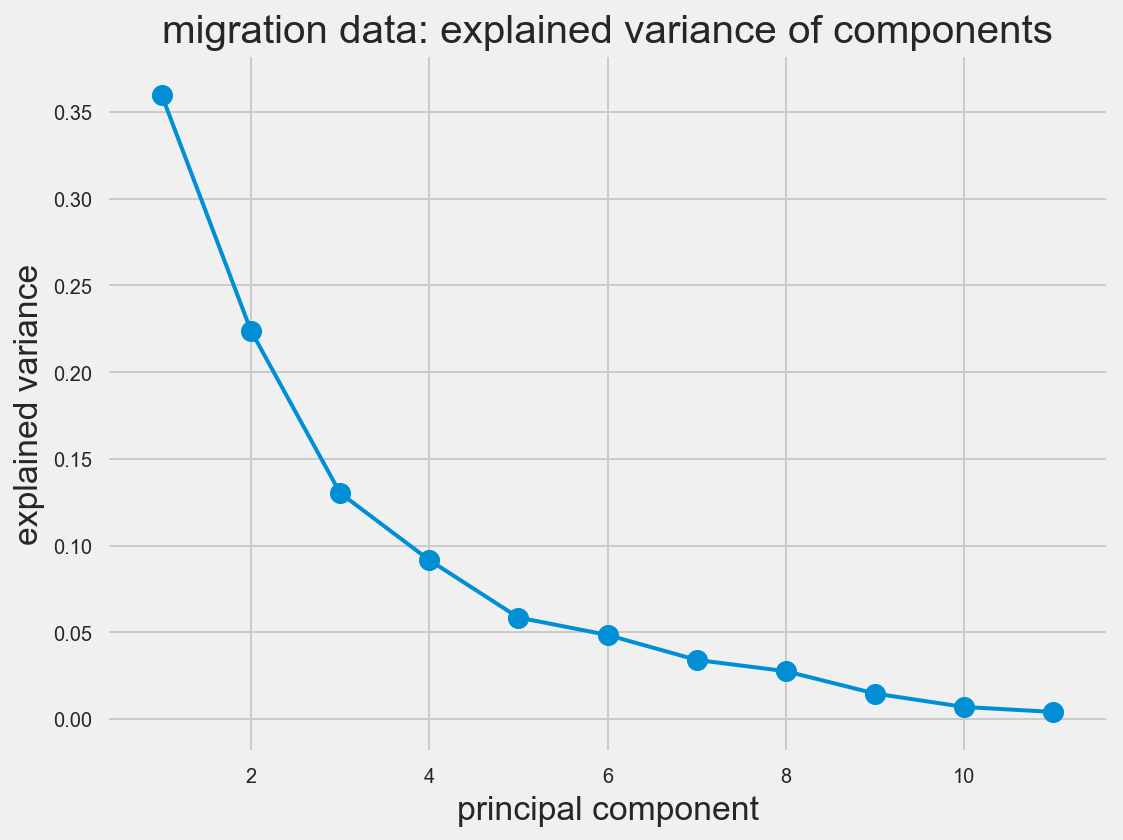

In [281]:
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(range(1, migration_cont.shape[1]+1), migration_pca.explained_variance_ratio_, lw=2)
ax.scatter(range(1, migration_cont.shape[1]+1), migration_pca.explained_variance_ratio_, s=100)
ax.set_title('migration data: explained variance of components')
ax.set_xlabel('principal component')
ax.set_ylabel('explained variance')
plt.show()

### Print out the component weights with their corresponding variables for PC1, PC2, and PC3

In [282]:
for col, comp in zip(migration_cont.columns, migration_pca.components_[0]):
    print col, comp

GDP_percapita_constant 0.444953784686
income_highest% -0.433783947612
income_lowest% 0.334104401133
poverty_headcount_1.90 -0.42408822848
death_rate -0.106912170586
unemployment 0.0948163627333
trade 0.0137408511283
pop_growth -0.419167628048
remittances 0.351743673355
net_bilateral_aid -0.0309566471764
FDI 0.0371274546902


In [283]:
for col, comp in zip(migration_cont.columns, migration_pca.components_[1]):
    print col, comp

GDP_percapita_constant -0.012166667719
income_highest% 0.208096986157
income_lowest% -0.233634353696
poverty_headcount_1.90 0.0765655576751
death_rate -0.538365104029
unemployment -0.305100519113
trade 0.55055897166
pop_growth -0.0563939732101
remittances 0.396597653328
net_bilateral_aid -0.222691861952
FDI -0.0004280254334


In [284]:
for col, comp in zip(migration_cont.columns, migration_pca.components_[3]):
    print col, comp

GDP_percapita_constant -0.037753685352
income_highest% 0.0175339147193
income_lowest% 0.028566403528
poverty_headcount_1.90 -0.0271247993477
death_rate -0.0639828470952
unemployment -0.0373895301668
trade 0.0462671590709
pop_growth -0.0730312142768
remittances 0.0420089510669
net_bilateral_aid 0.394499973419
FDI -0.909040403928


### Plot a seaborn pairplot of PC1, PC2, and PC3 with `hue='threshold'`

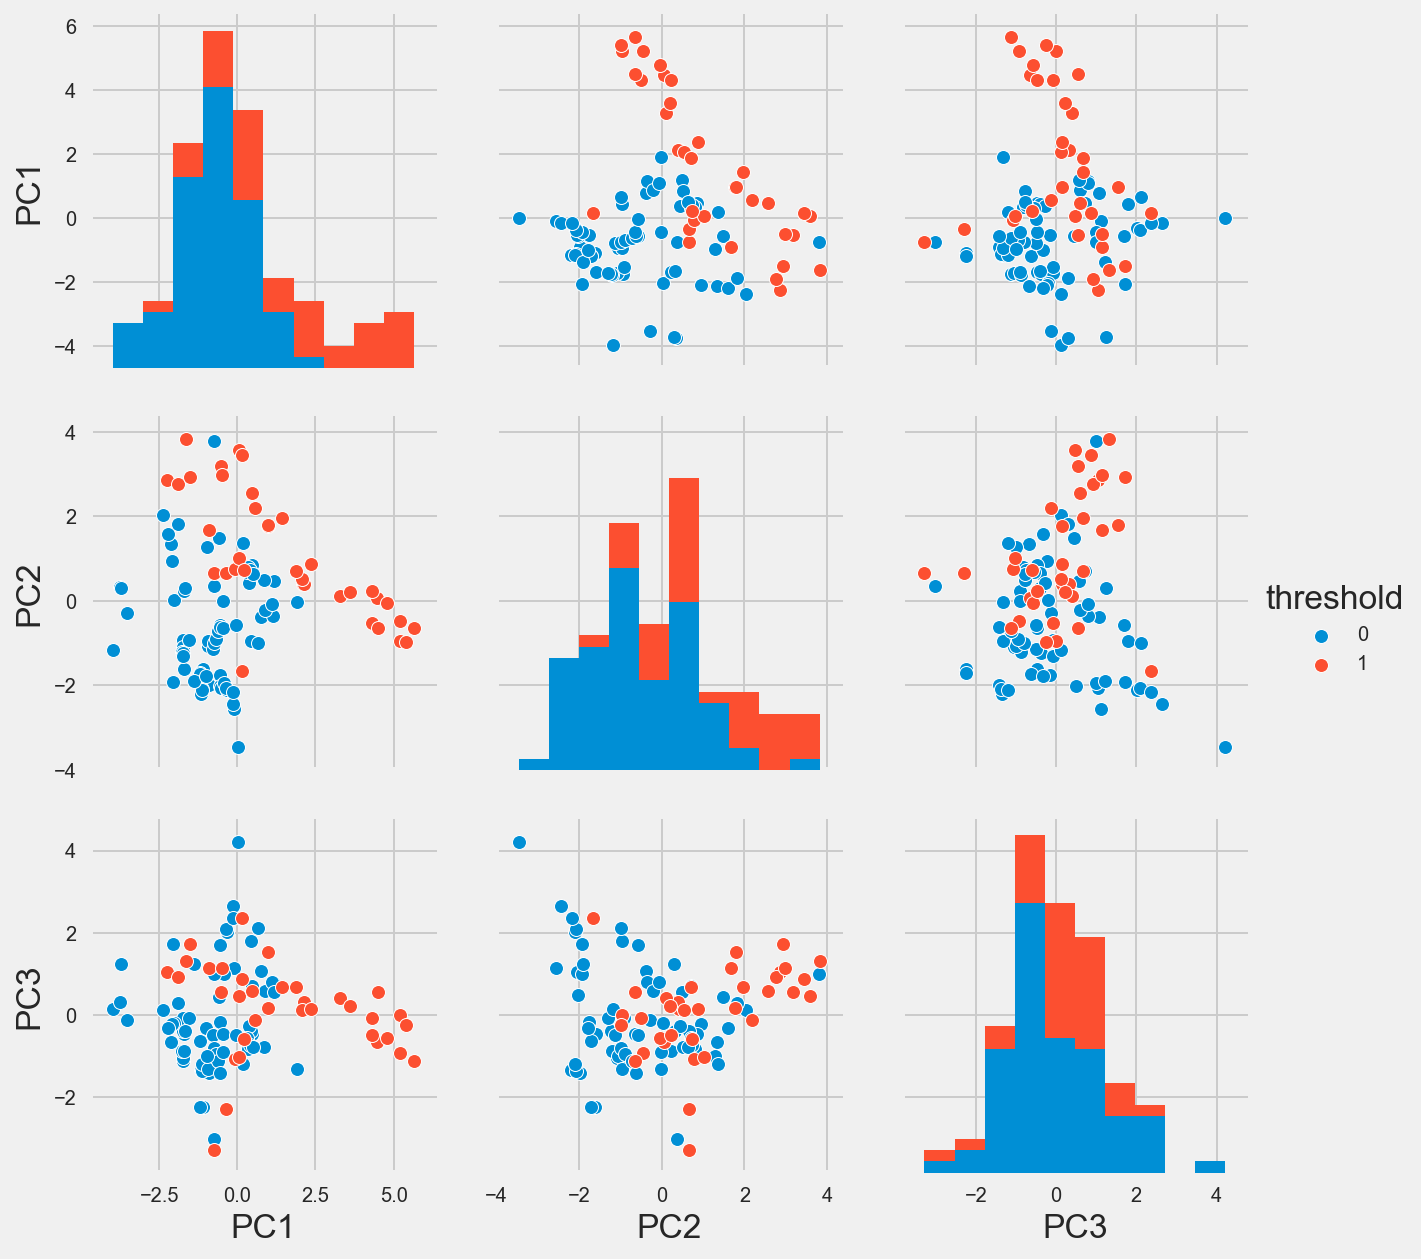

In [285]:
sns.pairplot(data=migration_pcs, vars=['PC1','PC2','PC3'], hue='threshold', size=3)
plt.show()

### Horn's parallel analysis

In [286]:
def horn_parallel_analysis(shape, iters=1000, percentile=95):
    pca = PCA(n_components=shape[1])
    eigenvals = []
    for i in range(iters):
        rdata = np.random.normal(0,1,size=shape)
        pca.fit(rdata)
        eigenvals.append(pca.explained_variance_)
    eigenvals = np.array(eigenvals)
    return np.percentile(eigenvals, percentile, axis=0)

### Run parallel analysis for the migration data

In [287]:
migration_pa = horn_parallel_analysis(migration_cont.shape, percentile=95)
migration_pa

array([ 1.78259703,  1.5597615 ,  1.39057351,  1.27295842,  1.15745361,
        1.05150508,  0.95585737,  0.86531285,  0.78163868,  0.68858056,
        0.6034336 ])

### Plot the wine eigenvalues (`.variance_explained_`) against the parallel analysis random eigenvalue cutoffs

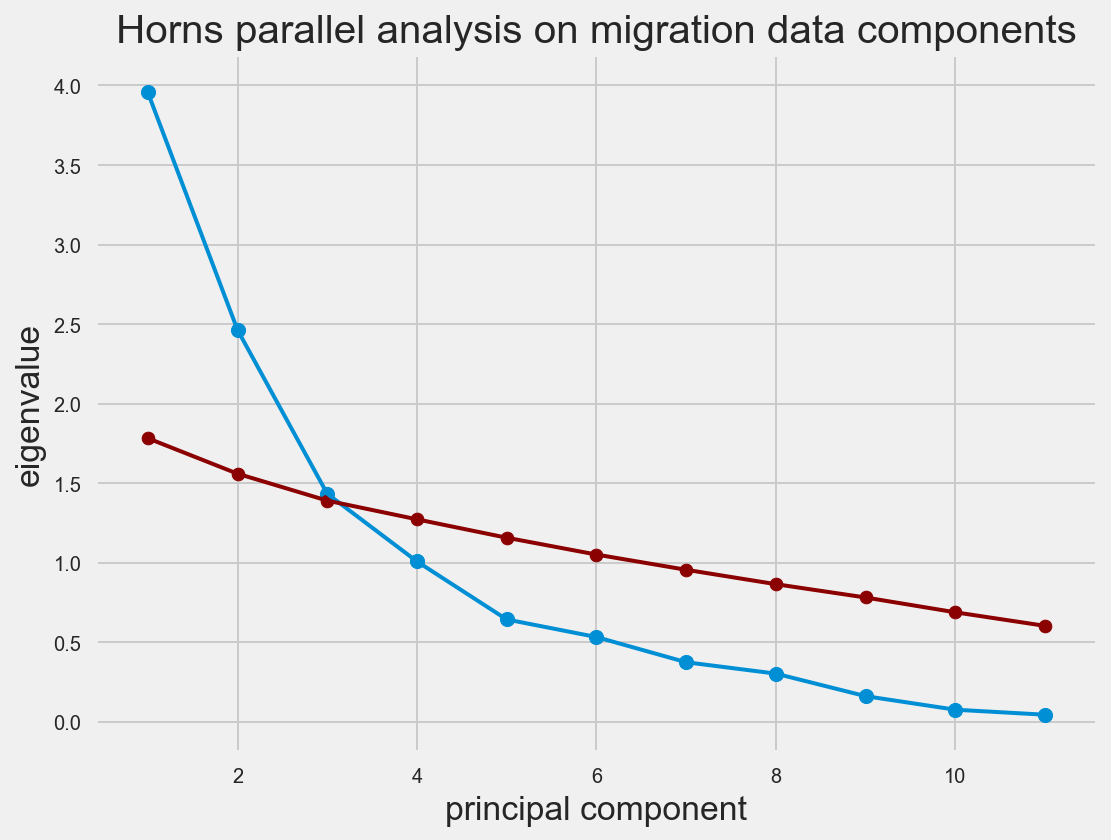

In [288]:
fig, ax = plt.subplots(figsize=(8,6))

ax.plot(range(1, migration_cont.shape[1]+1), migration_pca.explained_variance_, lw=2)
ax.scatter(range(1, migration_cont.shape[1]+1), migration_pca.explained_variance_, s=50)

ax.plot(range(1, len(migration_pa)+1), migration_pa, lw=2, color='darkred')
ax.scatter(range(1, len(migration_pa)+1), migration_pa, s=40, color='darkred')


ax.set_title('Horns parallel analysis on migration data components')
ax.set_xlabel('principal component')
ax.set_ylabel('eigenvalue')
plt.show()


### Predict "threshold" from original data and from PCA

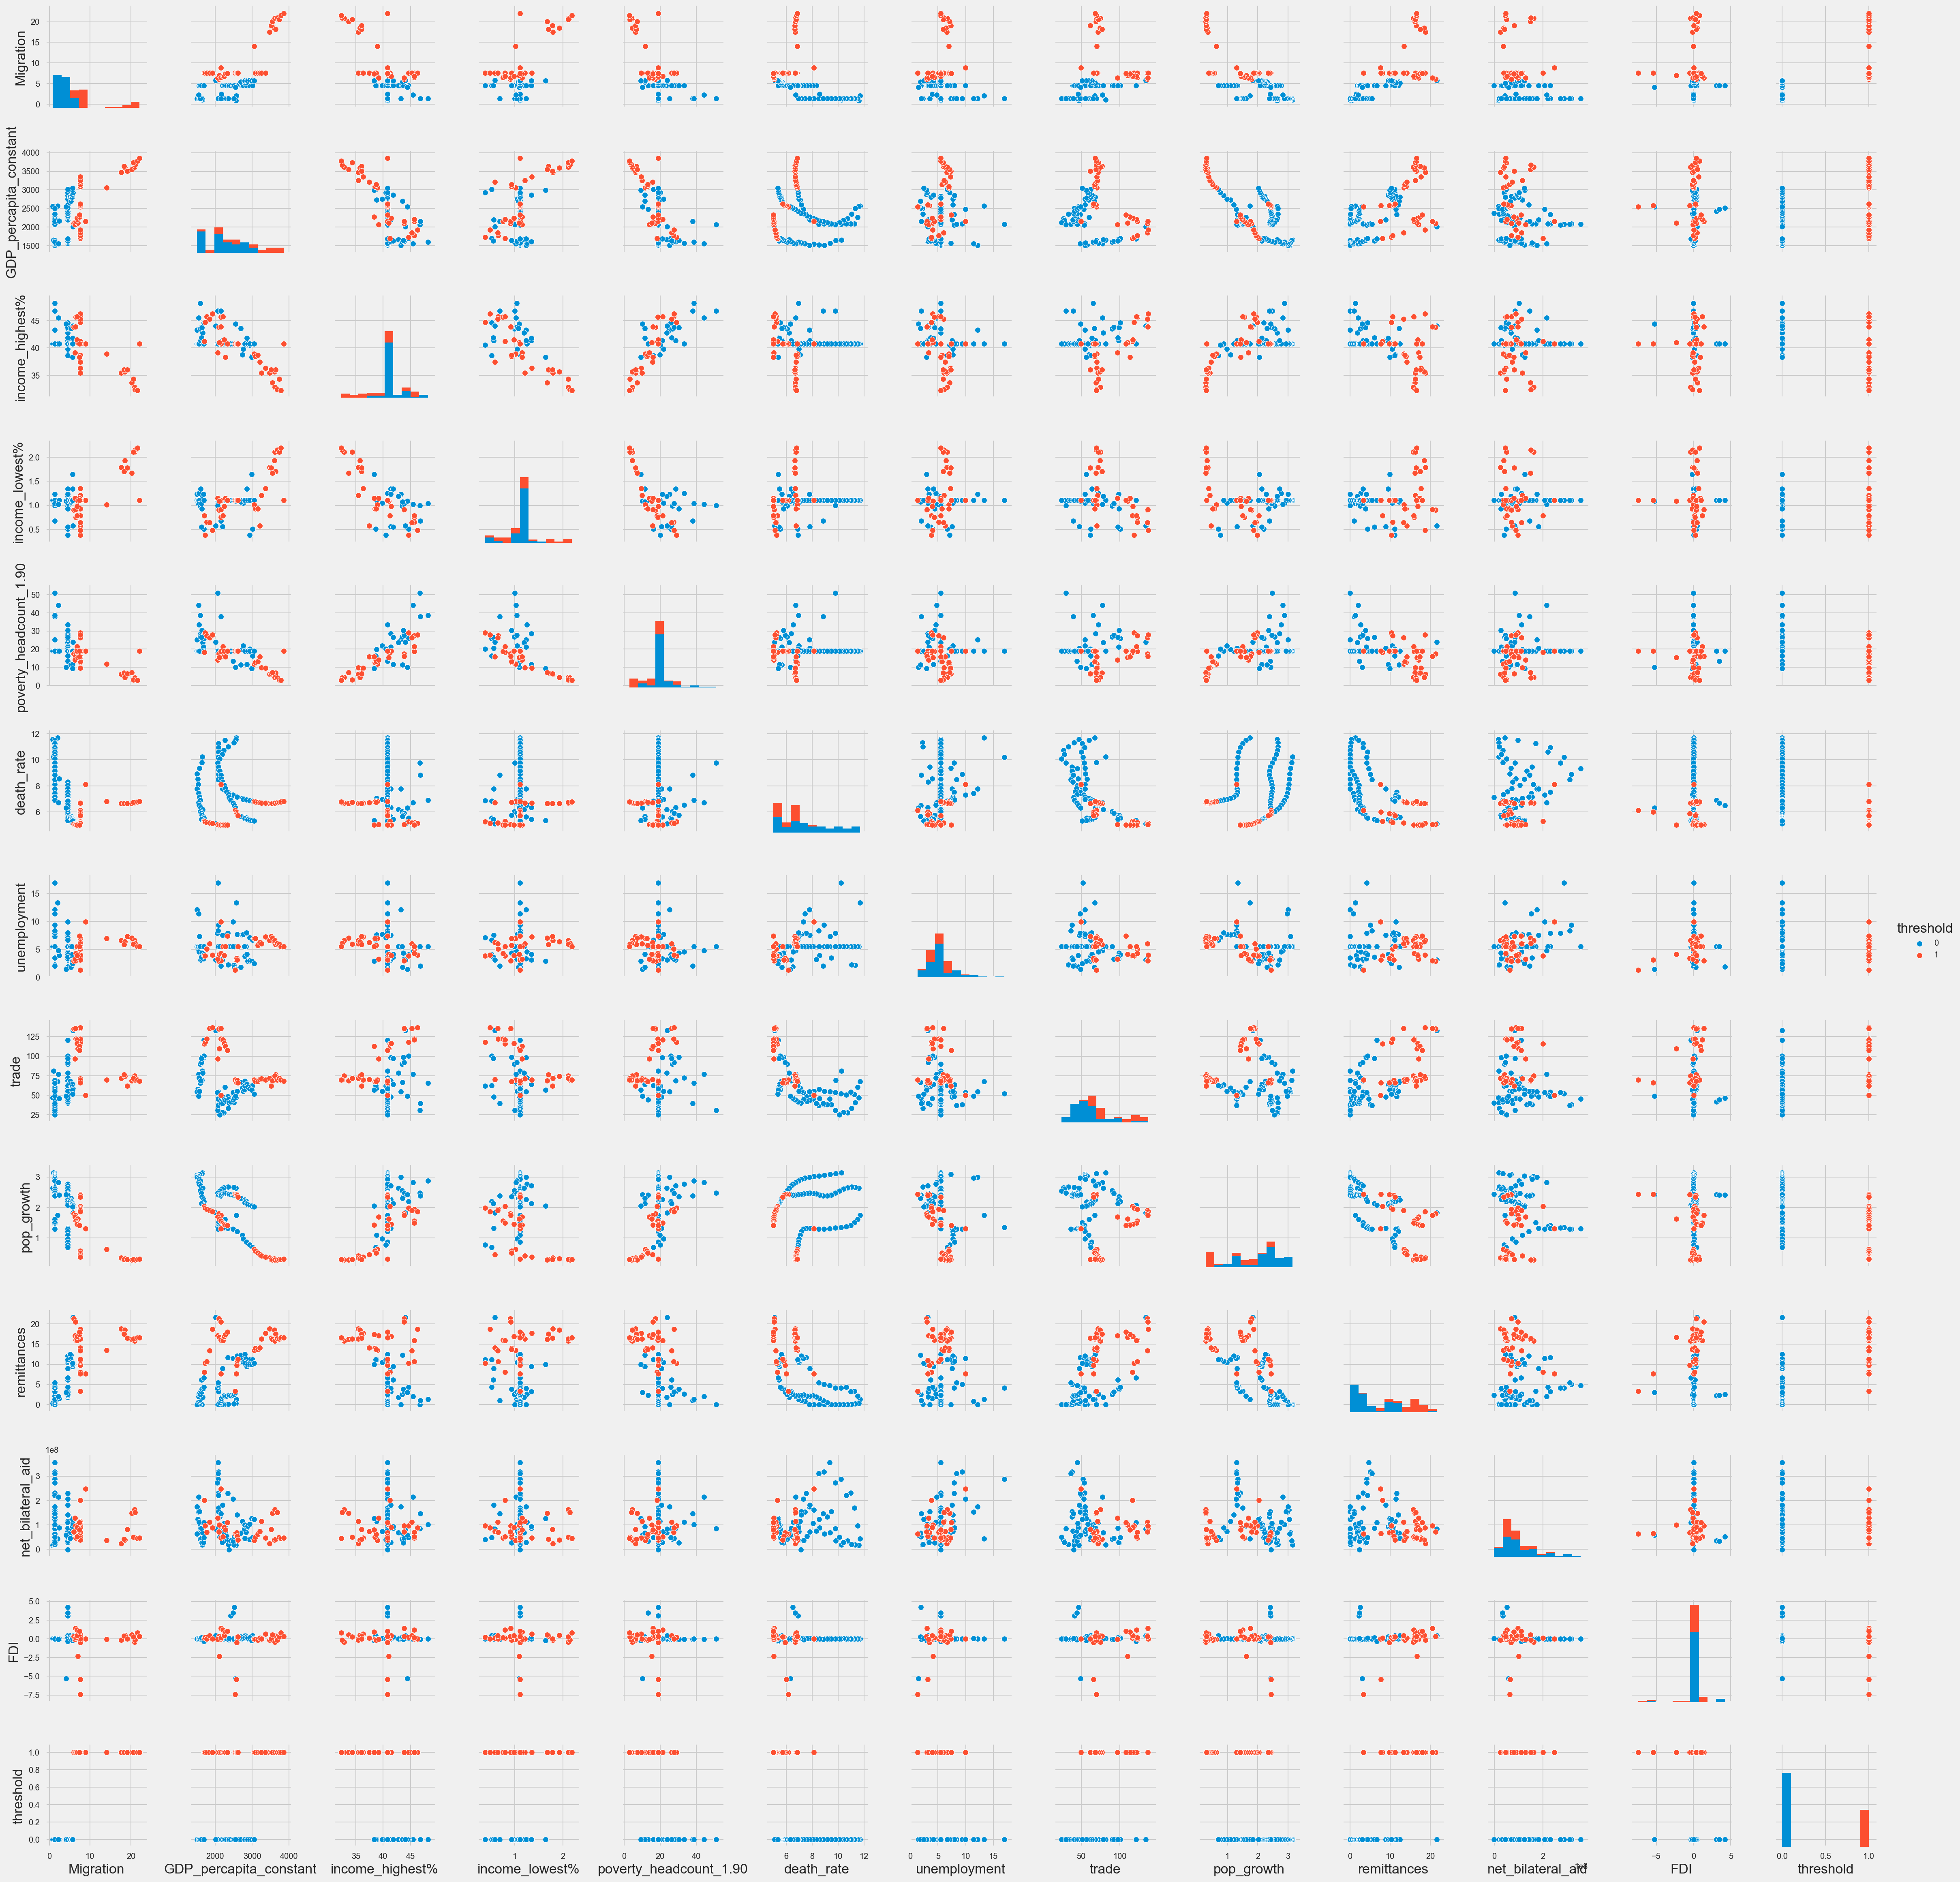

In [289]:
## Explore the noise on the original data
## should you Standarized the data? 
## http://stats.stackexchange.com/questions/48360/is-standardization-needed-before-fitting-logistic-regression
sns.pairplot(data=migration_flows, hue='threshold')
plt.show()

In [290]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cross_validation import cross_val_score, StratifiedKFold
from sklearn.grid_search import GridSearchCV
from sklearn.cross_validation import train_test_split

In [291]:
## Define your x and y
columns_ = migration_flows.columns.tolist()
exclude_cols = ['threshold', 'Country', 'Year']
y = migration_flows.threshold.values
X = migration_flows[[i for i in columns_ if i not in exclude_cols]]
X = X.values

In [292]:
knn = KNeighborsClassifier()

params = {
    'n_neighbors':range(1,20),
    'weights':['uniform','distance']
}

knn_gs = GridSearchCV(knn, params, cv=5, verbose=1)
knn_gs.fit(X, y)

print knn_gs.best_params_
best_knn = knn_gs.best_estimator_

Fitting 5 folds for each of 38 candidates, totalling 190 fits
{'n_neighbors': 10, 'weights': 'uniform'}


[Parallel(n_jobs=1)]: Done 190 out of 190 | elapsed:    0.8s finished


In [293]:
cv_indices = StratifiedKFold(y, n_folds=5)
## StratifiedKFold = Provides train/test indices to split data in train/test sets.
## http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html

logreg = LogisticRegression()

lr_scores_test = []
lr_scores_train = []

knn_scores_test = []
knn_scores_train = []

for train_inds, test_inds in cv_indices:
    
    Xtr, ytr = X[train_inds, :], y[train_inds]
    Xte, yte = X[test_inds, :], y[test_inds]
    print 'Xtrain and ytrain shapes:\n', Xtr.shape, ytr.shape
    print 'Xtest and ytest shapes:\n', Xte.shape, yte.shape

    
    best_knn.fit(Xtr, ytr)
    knn_scores_test.append(best_knn.score(Xte, yte))
    knn_scores_train.append(best_knn.score(Xtr, ytr))
    '''best_knn.score = Returns the mean accuracy on the given test data and labels'''
    y_knn_predict  = best_knn.predict(Xte)
    
    
    logreg.fit(Xtr, ytr)
    lr_scores_test.append(logreg.score(Xte, yte))
    lr_scores_train.append(logreg.score(Xtr, ytr))
    '''logreg.score = Returns the mean accuracy on the given test data and labels'''
    y_log_predict = logreg.predict(Xte)
    
    
print "\n======\n"
print 'KNN accuracy scores on test:\n', knn_scores_test
print 'KNN mean of accuracy scores on test:\n', np.mean(knn_scores_test)
print 'KNN mean of accuracy scores on train :\n', np.mean(knn_scores_train)
print "\n======\n"
print 'Logistic Regression accuracy scores on test:\n', lr_scores_test
print 'Logistic Regression mean of accuracy scores on test:\n', np.mean(lr_scores_test)
print 'Logistic Regression mean of accuracy scores on train:\n', np.mean(lr_scores_train)

print "\n======\n"
print 'Baseline accuracy:\n ', np.mean(y)

Xtrain and ytrain shapes:
(85, 12) (85,)
Xtest and ytest shapes:
(23, 12) (23,)
Xtrain and ytrain shapes:
(86, 12) (86,)
Xtest and ytest shapes:
(22, 12) (22,)
Xtrain and ytrain shapes:
(87, 12) (87,)
Xtest and ytest shapes:
(21, 12) (21,)
Xtrain and ytrain shapes:
(87, 12) (87,)
Xtest and ytest shapes:
(21, 12) (21,)
Xtrain and ytrain shapes:
(87, 12) (87,)
Xtest and ytest shapes:
(21, 12) (21,)


KNN accuracy scores on test:
[0.60869565217391308, 0.68181818181818177, 0.61904761904761907, 0.52380952380952384, 0.61904761904761907]
KNN mean of accuracy scores on test:
0.610483719179
KNN mean of accuracy scores on train :
0.662051354624


Logistic Regression accuracy scores on test:
[0.65217391304347827, 0.68181818181818177, 0.66666666666666663, 0.61904761904761907, 0.66666666666666663]
Logistic Regression mean of accuracy scores on test:
0.657274609449
Logistic Regression mean of accuracy scores on train:
0.657399562872


Baseline accuracy:
  0.333333333333


### We found very similar results with the KNN and logistic estimation

In [294]:
## Define your x and y
## For your X = only use the number of PCA's that have the greatest explanatory power

columns_ = migration_pcs.columns.tolist()
exclude_cols = ['Year', 'Country', 'PC5','PC6','PC7','PC8','PC9','PC10','PC11', 'threshold']

ypc = migration_pcs.threshold.values

Xpc = migration_pcs[[i for i in columns_ if i not in exclude_cols]]
Xpc = Xpc.values

### Perform stratified cross-validation on a KNN classifier and logisitic regression.

In [295]:
knn = KNeighborsClassifier()

params = {
    'n_neighbors':range(1,20),
    'weights':['uniform','distance']
}

knn_gs_pc = GridSearchCV(knn, params, cv=5, verbose=1)
knn_gs_pc.fit(Xpc, ypc)

print knn_gs_pc.best_params_
best_knn_pc = knn_gs_pc.best_estimator_

Fitting 5 folds for each of 38 candidates, totalling 190 fits
{'n_neighbors': 17, 'weights': 'uniform'}


[Parallel(n_jobs=1)]: Done 190 out of 190 | elapsed:    0.9s finished


In [296]:
cv_indices_pc = StratifiedKFold(ypc, n_folds=5)

logreg_pc = LogisticRegression()

lr_scores_test_pc = []
lr_scores_train_pc = []

knn_scores_test_pc = []
knn_scores_train_pc = []

for train_inds, test_inds in cv_indices_pc:
    
    Xtr_pc, ytr_pc = Xpc[train_inds, :], ypc[train_inds]
    Xte_pc, yte_pc = Xpc[test_inds, :], ypc[test_inds]
    print 'Xtrain and ytrain shapes:\n', Xtr_pc.shape, ytr_pc.shape
    print 'Xtest and ytest shapes:\n', Xte_pc.shape, yte_pc.shape

    
    best_knn_pc.fit(Xtr_pc, ytr_pc)
    knn_scores_test_pc.append(best_knn_pc.score(Xte_pc, yte_pc))
    knn_scores_train_pc.append(best_knn_pc.score(Xtr_pc, ytr_pc))
    '''best_knn.score = Returns the mean accuracy on the given test data and labels'''
    y_knn_predict_pc  = best_knn_pc.predict(Xte_pc)

    
    
    logreg_pc.fit(Xtr_pc, ytr_pc)
    lr_scores_test_pc.append(logreg_pc.score(Xte_pc, yte_pc))
    lr_scores_train_pc.append(logreg_pc.score(Xtr_pc, ytr_pc))
    '''logreg.score = Returns the mean accuracy on the given test data and labels'''
    y_log_predict_pc = logreg_pc.predict(Xte_pc)
    
print "\n======\n"
print 'KNN accuracy scores on test:\n', knn_scores_test_pc
print 'KNN mean of accuracy scores on test:\n', np.mean(knn_scores_test_pc)
print 'KNN mean of accuracy scores on train :\n', np.mean(knn_scores_train_pc)
print "\n======\n"
print 'Logistic Regression accuracy scores on test:\n', lr_scores_test_pc
print 'Logistic Regression mean of accuracy scores on test:\n', np.mean(lr_scores_test_pc)
print 'Logistic Regression mean of accuracy scores on train:\n', np.mean(lr_scores_train_pc)

print "\n======\n"
print 'Baseline accuracy:\n ', np.mean(ypc)

Xtrain and ytrain shapes:
(85, 4) (85,)
Xtest and ytest shapes:
(23, 4) (23,)
Xtrain and ytrain shapes:
(86, 4) (86,)
Xtest and ytest shapes:
(22, 4) (22,)
Xtrain and ytrain shapes:
(87, 4) (87,)
Xtest and ytest shapes:
(21, 4) (21,)
Xtrain and ytrain shapes:
(87, 4) (87,)
Xtest and ytest shapes:
(21, 4) (21,)
Xtrain and ytrain shapes:
(87, 4) (87,)
Xtest and ytest shapes:
(21, 4) (21,)


KNN accuracy scores on test:
[0.69565217391304346, 0.81818181818181823, 0.95238095238095233, 0.90476190476190477, 0.90476190476190477]
KNN mean of accuracy scores on test:
0.8551477508
KNN mean of accuracy scores on train :
0.872755633127


Logistic Regression accuracy scores on test:
[0.78260869565217395, 0.86363636363636365, 0.95238095238095233, 0.8571428571428571, 0.42857142857142855]
Logistic Regression mean of accuracy scores on test:
0.776868059477
Logistic Regression mean of accuracy scores on train:
0.937553658191


Baseline accuracy:
  0.333333333333


### We found more accurate results using a stratified cross validation in both KNN and the logistic estimation

In [297]:
'''the mean of the accuracy score on the test data has a significant increase from '''
print 'KNN mean of accuracy scores on test:\n', np.mean(knn_scores_test)
print 'KNN mean of accuracy scores on test PC:\n', np.mean(knn_scores_test_pc)
print "Increase of accuracy of:", (np.mean(knn_scores_test_pc) - np.mean(knn_scores_test))

KNN mean of accuracy scores on test:
0.610483719179
KNN mean of accuracy scores on test PC:
0.8551477508
Increase of accuracy of: 0.244664031621


### We have a significant increase in accuracy doing the parallel estimation of KNN and PC

### Confusion Matrix for each of your classification methods.

In [298]:
# Load Confusion Matrix 
from sklearn.metrics import confusion_matrix

In [299]:
def confus_mat(ytrue, ypred_method, what_predict):
    what_predict = str(what_predict)
    confmat = confusion_matrix(y_true=ytrue, y_pred=ypred_method)
    confusion = pd.DataFrame(confmat, index=['is_not_' + what_predict, 'is_' + what_predict],
                         columns=['predicted_is_not_'+ what_predict, 'predicted_is_'+what_predict])
    return confusion

In [300]:
# Load Classification Report
from sklearn.metrics import classification_report

In [301]:
def class_report(ytrue, ypred):
    cls_rep = classification_report(yte, y_knn_predict)
    print cls_rep

In [302]:
## Confuion Matrix for knn
confus_mat(yte, y_knn_predict, 'threshold')

predicted_is_not_threshold  predicted_is_threshold
is_not_threshold                          13                       1
is_threshold                               7                       0

In [303]:
## Classification report for knn
class_report(yte, y_knn_predict)

             precision    recall  f1-score   support

          0       0.65      0.93      0.76        14
          1       0.00      0.00      0.00         7

avg / total       0.43      0.62      0.51        21



In [304]:
## Confusion Matrix for logistic
confus_mat(yte, y_log_predict, 'threshold')

predicted_is_not_threshold  predicted_is_threshold
is_not_threshold                          14                       0
is_threshold                               7                       0

In [305]:
## Classification report for logistic
class_report(yte, y_log_predict)

             precision    recall  f1-score   support

          0       0.65      0.93      0.76        14
          1       0.00      0.00      0.00         7

avg / total       0.43      0.62      0.51        21



In [306]:
## Confuion Matrix for knn with PC
confus_mat(yte, y_knn_predict_pc, 'threshold')

predicted_is_not_threshold  predicted_is_threshold
is_not_threshold                          12                       2
is_threshold                               0                       7

In [307]:
## Classification report for knn with PC
class_report(yte, y_knn_predict_pc)

             precision    recall  f1-score   support

          0       0.65      0.93      0.76        14
          1       0.00      0.00      0.00         7

avg / total       0.43      0.62      0.51        21



In [308]:
## Confuion Matrix for log with PC
confus_mat(yte, y_log_predict_pc, 'threshold')

predicted_is_not_threshold  predicted_is_threshold
is_not_threshold                           2                      12
is_threshold                               0                       7

In [309]:
## Classification report for knn with PC
class_report(yte, y_log_predict_pc)

             precision    recall  f1-score   support

          0       0.65      0.93      0.76        14
          1       0.00      0.00      0.00         7

avg / total       0.43      0.62      0.51        21



### Our results from our confusion matrices suggest that it is better to use the parallel estimation of KNN and PC in order to have more accurate estimations. 